In [1]:
%matplotlib inline

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))


['train.csv.zip', 'test.csv', 'test.csv.zip', 'train.csv', 'sample_submission.csv.zip', 'sample_submission.csv']


In [3]:
import mlxtend
import pandas_profiling

import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew #for some statistics

import matplotlib.pyplot as plt


/home/yuki/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/yuki/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/yuki/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/yuki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/yuki/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/yuki/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.

In [4]:
%%time
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")


CPU times: user 35.8 s, sys: 1.77 s, total: 37.6 s
Wall time: 1min 16s


In [5]:
%%time
train_df.head()

CPU times: user 3.94 ms, sys: 248 µs, total: 4.19 ms
Wall time: 1.1 s


ID      target  48df886f9  0deb4b6a8  34b15f335  a8cb14b00  \
0  000d6aaf2  38000000.0        0.0          0        0.0          0   
1  000fbd867    600000.0        0.0          0        0.0          0   
2  0027d6b71  10000000.0        0.0          0        0.0          0   
3  0028cbf45   2000000.0        0.0          0        0.0          0   
4  002a68644  14400000.0        0.0          0        0.0          0   

   2f0771a37  30347e683  d08d1fbe3  6ee66e115    ...      3ecc09859  \
0          0          0          0          0    ...            0.0   
1          0          0          0          0    ...            0.0   
2          0          0          0          0    ...            0.0   
3          0          0          0          0    ...            0.0   
4          0          0          0          0    ...            0.0   

   9281abeea  8675bec0b  3a13ed79a  f677d4d13  71b203550  137efaa80  \
0        0.0        0.0          0          0          0          0   
1        0.0        0.0          0          0          0          0   
2        0.0        0.0          0          0          0          0   
3        0.0        0.0          0          0          0          0   
4        0.0        0.0          0          0          0          0   

   fb36b89d9  7e293fbaf  9fc776466  
0          0          0          0  
1          0          0          0  
2          0          0          0  
3          0          0          0  
4          0          0          0  

[5 rows x 4993 columns]

In [6]:
%%time
test_df.head()

CPU times: user 359 µs, sys: 23 µs, total: 382 µs
Wall time: 295 µs


ID  48df886f9  0deb4b6a8  34b15f335  a8cb14b00  2f0771a37  \
0  000137c73        0.0        0.0        0.0        0.0        0.0   
1  00021489f        0.0        0.0        0.0        0.0        0.0   
2  0004d7953        0.0        0.0        0.0        0.0        0.0   
3  00056a333        0.0        0.0        0.0        0.0        0.0   
4  00056d8eb        0.0        0.0        0.0        0.0        0.0   

   30347e683  d08d1fbe3  6ee66e115  20aa07010    ...      3ecc09859  \
0        0.0        0.0        0.0        0.0    ...            0.0   
1        0.0        0.0        0.0        0.0    ...            0.0   
2        0.0        0.0        0.0        0.0    ...            0.0   
3        0.0        0.0        0.0        0.0    ...            0.0   
4        0.0        0.0        0.0        0.0    ...            0.0   

   9281abeea  8675bec0b  3a13ed79a  f677d4d13  71b203550  137efaa80  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   fb36b89d9  7e293fbaf  9fc776466  
0        0.0        0.0        0.0  
1        0.0        0.0        0.0  
2        0.0        0.0        0.0  
3        0.0        0.0        0.0  
4        0.0        0.0        0.0  

[5 rows x 4992 columns]

# defining useful functions

## check dataframe general info

In [7]:

%matplotlib inline

import os

import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew #for some statistics

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import learning_curve

import mlxtend
from mlxtend.plotting import plot_learning_curves

import pandas_profiling





def checkNaValues(dataframe):
    """check nan values in dataframe"""
    
    print("\n# Is there any nan values?: ", dataframe.isna().all().all())
    
    print("## detail missing data ratio")
    #if dataframe.isna().all().all()
    dataframe_na = (dataframe.isna().sum()/len(dataframe))*100
    print(dataframe_na)
    dataframe_na = dataframe_na.drop(
        dataframe_na[dataframe_na == 0].index
    ).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio':dataframe_na})
    print(missing_data)
    
    
    """there is error. so not implemented yet
    # just plot the rate
    f, ax = plt.subplots(figsize=(15, 12))
    plt.xticks(rotation='90')
    sns.barplot(x=dataframe_na.index, y=dataframe_na.values)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    """

    
def checkObjTypeColumns(dataframe):
    """Check object dtype columns"""

    print("\n# object dtype columns")
    # object dtypeの列名からその列のデータのみを抽出
    df_object_type = dataframe[dataframe.select_dtypes(['object']).columns]
    #df_object_type = dataframe[[x for x in dataframe.columns if dataframe[x].dtypes == "object"]]
    print(df_object_type.head())
    #print(df_object_type.info()) # not useful info
    print(df_object_type.describe())

    
def checkValueCounts(dataframe):
    """check value counts of each features and find boolean feature or not."""

    print("# value_counts of each feature: ")
    for column in dataframe.columns:
        #print("## ", column, ": ")
        #print(dataframe[column].value_counts().head())
        if dataframe[column].value_counts().shape[0] <= 2:
            print(column, " -> maybe boolean. value count:  ", dataframe[column].value_counts().shape[0])
        else:
            print(column, " -> not boolean. value count:  ", dataframe[column].value_counts().shape[0])
            
            
def checkCorrelationOfFeatures(dataframe):
    """check correlation matix of each features"""

    # plot corr
    print("\n# correlation matrix")
    corrmat = dataframe.corr()
    plt.subplots(figsize=(12,9))
    sns.heatmap(corrmat, vmax=0.9, square=True)
    plt.show()
    print(corrmat)
    print()
    
    corr_values = corrmat.iloc[0]
    print("## highest correlation: ", corr_values.sort_values().head())
    print("## lowest correlation: ", corr_values.sort_values().tail())

    
def checkSkewness(dataframe):
    """check skewness of each features"""
    
    #numeric_feats = dataframe.dtypes[all_data.dtypes != "object"].index
    numeric_feats = dataframe.select_dtypes(exclude=['object'])
    #print(numeric_feats)
    # Check the skew of all numerical features
    skewed_feats = numeric_feats.apply(
        lambda x: skew(x.dropna())).sort_values(ascending=False)
    print("\n# Skew in numerical features: \n")
    skewness = pd.DataFrame({'Skew' :skewed_feats})
    print(skewness)
    
    
def checkAllDataInfo(dataframe):
    """print all dataframe info"""

    print(dataframe.head())
    print("\n# shape: ", dataframe.shape)
    print("\n# columns names: ", train_df.columns.values)
    
    print("\n# df.info(): ")
    print(dataframe.info())
    #print("\n# counts dtypes: \n", dataframe.dtypes.value_counts())# it is included in dataframe.info()

    print("\n# df.describe(): ")
    print(dataframe.describe())
    print()
    
    #print()
    #pandas_profiling.ProfileReport(dataframe)
    print()
    checkNaValues(dataframe)
    print()
    checkObjTypeColumns(dataframe)
    print()
    checkValueCounts(dataframe)
    print()
    #checkCorrelationOfFeatures(dataframe)
    
    print()
    checkSkewness(dataframe)
    
    
    
def my_plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        scoring="r2",
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [13]:
%%time
checkAllDataInfo(train_df)

          ID      target  48df886f9  0deb4b6a8  34b15f335  a8cb14b00  \
0  000d6aaf2  38000000.0        0.0          0        0.0          0   
1  000fbd867    600000.0        0.0          0        0.0          0   
2  0027d6b71  10000000.0        0.0          0        0.0          0   
3  0028cbf45   2000000.0        0.0          0        0.0          0   
4  002a68644  14400000.0        0.0          0        0.0          0   

   2f0771a37  30347e683  d08d1fbe3  6ee66e115    ...      3ecc09859  \
0          0          0          0          0    ...            0.0   
1          0          0          0          0    ...            0.0   
2          0          0          0          0    ...            0.0   
3          0          0          0          0    ...            0.0   
4          0          0          0          0    ...            0.0   

   9281abeea  8675bec0b  3a13ed79a  f677d4d13  71b203550  137efaa80  \
0        0.0        0.0          0          0          0          0  

ad207f7bb  -> not boolean. value count:   151
e7620cba2  -> not boolean. value count:   7
d40eb2705  -> not boolean. value count:   31
5d26f4d92  -> maybe boolean. value count:   2
fd206ec4d  -> not boolean. value count:   43
19a4e3e16  -> not boolean. value count:   4
e975d3be7  -> not boolean. value count:   19
0564ff72c  -> not boolean. value count:   109
bd7e6d2af  -> not boolean. value count:   5
4e86dd8f3  -> not boolean. value count:   235
2127bb611  -> not boolean. value count:   39
59dfc16da  -> not boolean. value count:   218
2f92a1a45  -> not boolean. value count:   60
63f968fa6  -> not boolean. value count:   69
312832f30  -> not boolean. value count:   50
6679fe54f  -> not boolean. value count:   70
9f05b2279  -> not boolean. value count:   4
dd2fc27b0  -> not boolean. value count:   25
af1d28337  -> not boolean. value count:   5
26b260c2b  -> not boolean. value count:   5
7207afb67  -> not boolean. value count:   47
4a3248e89  -> maybe boolean. value count:   2
4b6c549b1 

bacadce94  -> maybe boolean. value count:   2
73700eaa4  -> not boolean. value count:   159
c69492ae6  -> not boolean. value count:   72
65000b269  -> not boolean. value count:   113
dc135562a  -> not boolean. value count:   24
1d0aaa90f  -> not boolean. value count:   148
7497a6bc9  -> maybe boolean. value count:   2
2ca23426b  -> not boolean. value count:   68
bfde2aa61  -> maybe boolean. value count:   2
b0c8d785d  -> not boolean. value count:   6
b09a8c37b  -> not boolean. value count:   9
b30e932ba  -> not boolean. value count:   249
8516b48f5  -> not boolean. value count:   32
0a52be28f  -> not boolean. value count:   102
506e25985  -> not boolean. value count:   16
f519ac616  -> maybe boolean. value count:   2
833b35a7c  -> maybe boolean. value count:   1
faf024fa9  -> not boolean. value count:   163
3377a30e2  -> not boolean. value count:   17
8f3807320  -> not boolean. value count:   23
d0d340214  -> not boolean. value count:   134
d00346a32  -> not boolean. value count:   7
2

1a67a2101  -> not boolean. value count:   46
bf406b82b  -> not boolean. value count:   46
1d9078f84  -> not boolean. value count:   443
b41a9fc75  -> not boolean. value count:   106
90e069c70  -> not boolean. value count:   25
7950f4c11  -> not boolean. value count:   58
b2790ef54  -> not boolean. value count:   45
906d4316d  -> not boolean. value count:   32
1210d0271  -> maybe boolean. value count:   1
3c6980c42  -> not boolean. value count:   135
21b0a54cb  -> maybe boolean. value count:   1
2a3763e18  -> not boolean. value count:   178
f4e855860  -> not boolean. value count:   40
4b2316bd5  -> not boolean. value count:   30
298db341e  -> not boolean. value count:   107
01fdd93d3  -> not boolean. value count:   94
9ca9e4916  -> not boolean. value count:   26
89ca53693  -> not boolean. value count:   62
47abb3cb4  -> not boolean. value count:   128
da35e792b  -> maybe boolean. value count:   1
85816f8e3  -> not boolean. value count:   26
45a400659  -> not boolean. value count:   114


b0385cee8  -> not boolean. value count:   55
3c7c7e24c  -> maybe boolean. value count:   1
1f8a823f2  -> not boolean. value count:   193
a8c17e75c  -> not boolean. value count:   3
320c3880a  -> not boolean. value count:   44
94cdda53f  -> not boolean. value count:   113
1e4464cd6  -> not boolean. value count:   4
eb8cbd733  -> not boolean. value count:   70
08a6181d8  -> not boolean. value count:   5
2c338b4d6  -> not boolean. value count:   18
985f4005a  -> not boolean. value count:   7
bc70cbc26  -> not boolean. value count:   298
30cef4483  -> maybe boolean. value count:   2
68c7cf320  -> not boolean. value count:   192
284d07c28  -> not boolean. value count:   47
49ca7ff2e  -> not boolean. value count:   222
b94360a3b  -> not boolean. value count:   6
616be0c3e  -> not boolean. value count:   126
22f95560c  -> not boolean. value count:   71
6760927a0  -> not boolean. value count:   29
d00f7d768  -> not boolean. value count:   35
fc99f9426  -> not boolean. value count:   551
2e00af

2dd0e885c  -> not boolean. value count:   21
f17ff4efd  -> not boolean. value count:   78
0a7ef2f9b  -> not boolean. value count:   29
fcc17a41d  -> not boolean. value count:   91
79e0c374a  -> not boolean. value count:   114
170b48e6b  -> maybe boolean. value count:   2
a697e9248  -> not boolean. value count:   21
66891582e  -> not boolean. value count:   125
23c3f4cd9  -> not boolean. value count:   15
746cdb817  -> maybe boolean. value count:   1
540cc3cd1  -> not boolean. value count:   223
65d14abf0  -> not boolean. value count:   113
ac7a97382  -> not boolean. value count:   78
890d30d93  -> not boolean. value count:   31
24292d615  -> not boolean. value count:   26
55f2b3d34  -> not boolean. value count:   98
c21bcefe0  -> not boolean. value count:   5
7b0d065a9  -> not boolean. value count:   7
1aca2cf15  -> not boolean. value count:   4
ed9e99c25  -> not boolean. value count:   40
20868afc1  -> not boolean. value count:   35
375c6080e  -> not boolean. value count:   119
edc841

8f3ab95d5  -> not boolean. value count:   4
66671ad38  -> not boolean. value count:   28
2b21cd7d8  -> maybe boolean. value count:   1
da1d826f5  -> not boolean. value count:   17
8643f2a4a  -> not boolean. value count:   6
476d95ef1  -> not boolean. value count:   235
20a58c359  -> not boolean. value count:   41
d7334935b  -> not boolean. value count:   110
f9a30f20a  -> maybe boolean. value count:   2
b36a21d49  -> not boolean. value count:   120
e4159c59e  -> not boolean. value count:   188
a8f80f111  -> not boolean. value count:   110
48282f315  -> not boolean. value count:   101
f66c58ca7  -> maybe boolean. value count:   2
598ae7ea9  -> maybe boolean. value count:   2
0db8a9272  -> maybe boolean. value count:   1
ddc07c4d6  -> maybe boolean. value count:   2
75d240f7b  -> not boolean. value count:   69
b02dfb243  -> not boolean. value count:   64
804d8b55b  -> maybe boolean. value count:   1
50a0d7f71  -> not boolean. value count:   78
ce1f5b02a  -> not boolean. value count:   49

983f4e3dc  -> not boolean. value count:   4
e07ee6287  -> not boolean. value count:   8
bdbb0cd24  -> not boolean. value count:   35
5d4b3b236  -> not boolean. value count:   26
215ffb087  -> not boolean. value count:   30
0c5eaf8a7  -> maybe boolean. value count:   2
2dfea2ff3  -> not boolean. value count:   65
53a550111  -> not boolean. value count:   181
de7063efa  -> not boolean. value count:   19
f52409b3e  -> not boolean. value count:   4
d0f65188c  -> not boolean. value count:   146
65119177e  -> not boolean. value count:   103
2d60e2f7a  -> not boolean. value count:   96
197cb48af  -> not boolean. value count:   219
58ad51def  -> maybe boolean. value count:   1
5e6a5bce6  -> maybe boolean. value count:   2
947c7c3e8  -> not boolean. value count:   38
9a9fc1aba  -> not boolean. value count:   115
03ee30b8e  -> not boolean. value count:   101
159e45efa  -> not boolean. value count:   4
d746efbfe  -> not boolean. value count:   117
d8e8397ce  -> not boolean. value count:   25
c685

9b490abb3  -> not boolean. value count:   257
4a3baddf6  -> not boolean. value count:   20
29e58696d  -> not boolean. value count:   17
904907a8f  -> not boolean. value count:   28
5e1085022  -> not boolean. value count:   35
03490ef8c  -> not boolean. value count:   21
c3f400e36  -> not boolean. value count:   163
3c209d9b6  -> not boolean. value count:   132
6c9ae21e2  -> not boolean. value count:   6
5755fe831  -> not boolean. value count:   59
ad57dea17  -> not boolean. value count:   19
1401de8c2  -> not boolean. value count:   108
588106548  -> not boolean. value count:   67
b219e3635  -> not boolean. value count:   71
e2b4d4ef7  -> not boolean. value count:   52
8646c43a7  -> not boolean. value count:   4
8e8736fc8  -> not boolean. value count:   118
e9770863c  -> maybe boolean. value count:   2
15d57abf7  -> maybe boolean. value count:   2
ba42e41fa  -> not boolean. value count:   204
433d408b2  -> not boolean. value count:   13
24303647f  -> not boolean. value count:   3
a5fb0

85ef8a837  -> not boolean. value count:   143
518b5da24  -> not boolean. value count:   105
089ff7bcb  -> not boolean. value count:   20
6ff9b1760  -> not boolean. value count:   61
1bf2dfd4a  -> not boolean. value count:   92
882a3da34  -> not boolean. value count:   83
8c549c040  -> not boolean. value count:   6
8d81c1c27  -> not boolean. value count:   130
f553483a0  -> not boolean. value count:   16
317ee395d  -> not boolean. value count:   110
2c1ed7d88  -> not boolean. value count:   98
fec5644cf  -> not boolean. value count:   263
398cdc105  -> not boolean. value count:   10
e7071d5e3  -> not boolean. value count:   91
83635fb67  -> not boolean. value count:   254
ebccb542e  -> not boolean. value count:   5
dd6cc6c51  -> not boolean. value count:   3
a6bf610b3  -> not boolean. value count:   26
daf731030  -> not boolean. value count:   5
10961e428  -> not boolean. value count:   4
22dbe574a  -> not boolean. value count:   48
c95423453  -> not boolean. value count:   41
f0eb7b98f

51c9aee7e  -> not boolean. value count:   29
400e9303d  -> not boolean. value count:   363
543010a22  -> not boolean. value count:   4
f990bddac  -> not boolean. value count:   26
0dc4d6c7d  -> not boolean. value count:   292
03055cc36  -> not boolean. value count:   72
4e4e9d21b  -> not boolean. value count:   24
7be4eb1e5  -> not boolean. value count:   16
3d23e8abd  -> not boolean. value count:   163
2f26d70f4  -> not boolean. value count:   203
a22d58a16  -> not boolean. value count:   16
c25078fd7  -> not boolean. value count:   108
ddef5ad30  -> not boolean. value count:   45
ae7d89da3  -> not boolean. value count:   4
5da2e6220  -> not boolean. value count:   53
d60ddde1b  -> maybe boolean. value count:   2
1d293a2f3  -> not boolean. value count:   3
20ef8d615  -> not boolean. value count:   124
1b55f7f4d  -> not boolean. value count:   77
4ef309fc3  -> not boolean. value count:   64
9e7c6b515  -> not boolean. value count:   231
56e98e3ad  -> not boolean. value count:   31
9b053

d5fa73ead  -> not boolean. value count:   336
a320c9747  -> not boolean. value count:   23
5b318b659  -> not boolean. value count:   99
1c6c0ffb1  -> not boolean. value count:   118
32cab3140  -> not boolean. value count:   116
718ce36a5  -> not boolean. value count:   4
0989e152f  -> not boolean. value count:   10
238af49a8  -> maybe boolean. value count:   2
de06e884c  -> maybe boolean. value count:   1
834fb292d  -> not boolean. value count:   65
545d84e13  -> not boolean. value count:   23
098913433  -> not boolean. value count:   18
5271beb00  -> not boolean. value count:   26
6ffeb3fdb  -> not boolean. value count:   4
0427cdb39  -> not boolean. value count:   20
6ebf9e1d9  -> not boolean. value count:   13
2386963e4  -> not boolean. value count:   4
f6ba9573d  -> not boolean. value count:   6
7de39a7eb  -> not boolean. value count:   195
15960e710  -> not boolean. value count:   32
68afb64c3  -> not boolean. value count:   6
232356685  -> not boolean. value count:   3
40e17d035 

07b31de85  -> not boolean. value count:   28
f1fbe249b  -> not boolean. value count:   50
6b795a2bc  -> not boolean. value count:   233
797c94ca1  -> not boolean. value count:   3
72dd076a5  -> not boolean. value count:   3
110e4132e  -> not boolean. value count:   136
601d54a3a  -> not boolean. value count:   38
8c922fa9a  -> not boolean. value count:   71
dba14a5d4  -> not boolean. value count:   15
ded346ef9  -> not boolean. value count:   5
3837a83c8  -> not boolean. value count:   3
6eaea198c  -> not boolean. value count:   259
97ea72529  -> not boolean. value count:   56
279d380ce  -> not boolean. value count:   19
1beb0ce65  -> not boolean. value count:   177
9ebc2a273  -> maybe boolean. value count:   2
643ef6977  -> not boolean. value count:   44
5ee81cb6e  -> not boolean. value count:   161
235b8beac  -> not boolean. value count:   218
aecd09bf5  -> not boolean. value count:   129
2c5809e51  -> not boolean. value count:   21
655fe23b2  -> not boolean. value count:   22
17e160

1413972fe  -> not boolean. value count:   12
42481ff40  -> not boolean. value count:   5
2e762ec53  -> not boolean. value count:   21
4bffaff52  -> not boolean. value count:   106
8768af50f  -> not boolean. value count:   29
b75aa754d  -> not boolean. value count:   236
cb22f8a26  -> not boolean. value count:   4
0b1560062  -> not boolean. value count:   123
ce573744f  -> maybe boolean. value count:   1
ed1d5d137  -> not boolean. value count:   57
c6e8b5b5c  -> maybe boolean. value count:   2
6f9d256a9  -> not boolean. value count:   37
3d4a6baed  -> not boolean. value count:   55
26144d11f  -> not boolean. value count:   114
526a2282d  -> not boolean. value count:   4
56a21fe66  -> not boolean. value count:   89
57b902085  -> not boolean. value count:   32
bbd7e6282  -> not boolean. value count:   28
95f5f514d  -> not boolean. value count:   4
0616154cc  -> not boolean. value count:   224
55a7e0643  -> not boolean. value count:   138
d53c850fd  -> maybe boolean. value count:   2
91ace

4810efa27  -> not boolean. value count:   15
dff08f7d5  -> not boolean. value count:   67
191e21b5f  -> not boolean. value count:   201
bb6f50464  -> not boolean. value count:   83
0256b6714  -> not boolean. value count:   163
3bdee45be  -> not boolean. value count:   326
3b911747c  -> maybe boolean. value count:   2
17be6c4e7  -> not boolean. value count:   74
92eb376f1  -> not boolean. value count:   23
1029d9146  -> not boolean. value count:   122
ef2056ce5  -> not boolean. value count:   23
ad4e33a4c  -> not boolean. value count:   94
4bf2b8e7c  -> not boolean. value count:   68
8b710e161  -> not boolean. value count:   125
087e01c14  -> not boolean. value count:   103
b658cdb8f  -> maybe boolean. value count:   2
c63b4a070  -> not boolean. value count:   118
8dbd95b8d  -> not boolean. value count:   22
c0f2800fc  -> not boolean. value count:   47
5a648a09d  -> not boolean. value count:   21
7f9e0d947  -> not boolean. value count:   14
57e185aad  -> not boolean. value count:   124


2f489369f  -> not boolean. value count:   22
354d9a875  -> not boolean. value count:   21
fb2ab1513  -> not boolean. value count:   31
a8350fa96  -> maybe boolean. value count:   2
246488579  -> not boolean. value count:   5
232ecc840  -> not boolean. value count:   13
f1eeb56ae  -> not boolean. value count:   63
3aad48cda  -> not boolean. value count:   195
5f5cfc3c0  -> not boolean. value count:   148
5374a601b  -> not boolean. value count:   227
e1e8947d8  -> not boolean. value count:   110
8016f08af  -> not boolean. value count:   20
9ee0b383b  -> not boolean. value count:   16
a24ff79e5  -> not boolean. value count:   5
e84c67382  -> not boolean. value count:   5
34a2f580b  -> not boolean. value count:   110
1e1cb47f3  -> not boolean. value count:   50
56b9c3eb3  -> not boolean. value count:   15
5807de036  -> not boolean. value count:   94
c1b95c2ec  -> maybe boolean. value count:   1
5c79d86bc  -> not boolean. value count:   9
282cfe2ad  -> not boolean. value count:   75
bc8aebe

a2bd73c67  -> not boolean. value count:   7
973663d14  -> not boolean. value count:   130
3a66c353a  -> not boolean. value count:   101
a79b1f060  -> not boolean. value count:   50
95df9fdfc  -> not boolean. value count:   8
e53805953  -> not boolean. value count:   198
12122f265  -> not boolean. value count:   90
2e3c96323  -> not boolean. value count:   208
22a7d1de9  -> not boolean. value count:   8
9f7b782ac  -> not boolean. value count:   255
467c54d35  -> not boolean. value count:   117
4cffe31c7  -> not boolean. value count:   79
a1d11c496  -> not boolean. value count:   62
635fbbd2c  -> not boolean. value count:   61
3974799dd  -> not boolean. value count:   25
bf35dbb69  -> not boolean. value count:   6
6f951302c  -> not boolean. value count:   249
818fce796  -> not boolean. value count:   3
8e1dfcb94  -> not boolean. value count:   94
f0317ca4f  -> not boolean. value count:   133
f7f2e3896  -> not boolean. value count:   3
bd308fe52  -> not boolean. value count:   236
9616802

2e51c4645  -> not boolean. value count:   35
5cc9b6615  -> not boolean. value count:   81
11e12dbe8  -> not boolean. value count:   290
df8466d2a  -> not boolean. value count:   7
eb4a20186  -> not boolean. value count:   156
83b151006  -> not boolean. value count:   25
2288333b4  -> not boolean. value count:   343
04e7a8426  -> not boolean. value count:   4
b6e38a517  -> not boolean. value count:   49
9d2835f75  -> not boolean. value count:   31
6610f90f1  -> not boolean. value count:   66
b10f15193  -> not boolean. value count:   246
4fa02e1a8  -> not boolean. value count:   178
e0a18e5b6  -> not boolean. value count:   28
2bc6017e1  -> not boolean. value count:   4
3839f8553  -> not boolean. value count:   185
a8c7f5c13  -> maybe boolean. value count:   2
00e87edf2  -> not boolean. value count:   104
4b9540ab3  -> not boolean. value count:   232
82775fc92  -> not boolean. value count:   76
81e4c7077  -> not boolean. value count:   67
d62a74f59  -> maybe boolean. value count:   2
fa1

c55eb4392  -> not boolean. value count:   45
d7db08081  -> not boolean. value count:   14
aa7223176  -> not boolean. value count:   201
a3ef69ad5  -> not boolean. value count:   273
b6336ff10  -> not boolean. value count:   31
b8255c039  -> not boolean. value count:   3
435f27009  -> not boolean. value count:   232
45ffef194  -> maybe boolean. value count:   1
c15ac04ee  -> maybe boolean. value count:   1
633e0d42e  -> not boolean. value count:   95
578b81a77  -> not boolean. value count:   182
f1b6cc03f  -> not boolean. value count:   134
4c53b206e  -> not boolean. value count:   190
2a3ac7716  -> maybe boolean. value count:   2
1f2a670dd  -> not boolean. value count:   105
9d2dea573  -> not boolean. value count:   54
bb0ce54e9  -> not boolean. value count:   273
f765e41ac  -> not boolean. value count:   3
fe3fe2667  -> not boolean. value count:   58
ad4d381a5  -> not boolean. value count:   25
b93c33953  -> not boolean. value count:   30
314396b31  -> not boolean. value count:   95
b

2be024de7  -> not boolean. value count:   108
4ecc3f505  -> not boolean. value count:   156
2d6565ce2  -> not boolean. value count:   241
230a025ca  -> not boolean. value count:   218
4eb8d43ec  -> not boolean. value count:   3
9118fd5ca  -> maybe boolean. value count:   1
962424dd3  -> not boolean. value count:   201
f514fdb2e  -> not boolean. value count:   326
6f44294b2  -> not boolean. value count:   29
e438105db  -> not boolean. value count:   103
bfab69d22  -> not boolean. value count:   7
7cd18fa5c  -> not boolean. value count:   24
a67d02050  -> not boolean. value count:   247
ca8d565f1  -> maybe boolean. value count:   1
a7e708ce5  -> not boolean. value count:   6
9a07d7b1f  -> not boolean. value count:   283
a8b6710d0  -> not boolean. value count:   92
5995250df  -> not boolean. value count:   3
cf488d633  -> not boolean. value count:   197
cf466bdd6  -> not boolean. value count:   6
1472ad855  -> not boolean. value count:   51
79e55ef6c  -> not boolean. value count:   129
50

3e3822506  -> not boolean. value count:   5
21bd61954  -> not boolean. value count:   209
097836097  -> not boolean. value count:   173
28690ae0d  -> not boolean. value count:   8
46b02f955  -> not boolean. value count:   13
6bb4be4f2  -> not boolean. value count:   16
f23c83554  -> maybe boolean. value count:   2
ea4046b8d  -> not boolean. value count:   316
e5b2d137a  -> not boolean. value count:   191
923a0c4bc  -> not boolean. value count:   20
b4cd81ecd  -> not boolean. value count:   8
05d95861b  -> not boolean. value count:   3
05f99c615  -> not boolean. value count:   5
f1851d155  -> not boolean. value count:   194
8618bc1fd  -> not boolean. value count:   232
06be6c2bb  -> not boolean. value count:   228
0892b3439  -> not boolean. value count:   74
70d96c477  -> not boolean. value count:   4
2c5819699  -> not boolean. value count:   4
077c3511c  -> not boolean. value count:   4
a8dd5cea5  -> not boolean. value count:   144
9e2040e5b  -> not boolean. value count:   90
96b66294d

afc08501b  -> not boolean. value count:   12
89e7dcacc  -> not boolean. value count:   103
1bf1406eb  -> maybe boolean. value count:   2
ee0b53f05  -> not boolean. value count:   76
defcc2c50  -> not boolean. value count:   23
14d1d798e  -> not boolean. value count:   3
a8e562e8e  -> maybe boolean. value count:   1
ebf53ab7c  -> not boolean. value count:   4
6b142730f  -> not boolean. value count:   5
b8f892930  -> not boolean. value count:   223
4d1f9e4d7  -> not boolean. value count:   55
15e8d7f53  -> not boolean. value count:   6
683d89bf1  -> not boolean. value count:   65
9ed0e6ddb  -> not boolean. value count:   103
f6c436744  -> not boolean. value count:   36
2a7ac8010  -> not boolean. value count:   32
4bd1722dc  -> not boolean. value count:   3
ea26c7fe6  -> not boolean. value count:   130
323fd38a8  -> not boolean. value count:   3
eb6bb7ce1  -> maybe boolean. value count:   1
78f45daba  -> not boolean. value count:   6
46c525541  -> not boolean. value count:   128
310e1ede9

In [14]:
%%time
checkAllDataInfo(test_df)

          ID  48df886f9  0deb4b6a8  34b15f335  a8cb14b00  2f0771a37  \
0  000137c73        0.0        0.0        0.0        0.0        0.0   
1  00021489f        0.0        0.0        0.0        0.0        0.0   
2  0004d7953        0.0        0.0        0.0        0.0        0.0   
3  00056a333        0.0        0.0        0.0        0.0        0.0   
4  00056d8eb        0.0        0.0        0.0        0.0        0.0   

   30347e683  d08d1fbe3  6ee66e115  20aa07010    ...      3ecc09859  \
0        0.0        0.0        0.0        0.0    ...            0.0   
1        0.0        0.0        0.0        0.0    ...            0.0   
2        0.0        0.0        0.0        0.0    ...            0.0   
3        0.0        0.0        0.0        0.0    ...            0.0   
4        0.0        0.0        0.0        0.0    ...            0.0   

   9281abeea  8675bec0b  3a13ed79a  f677d4d13  71b203550  137efaa80  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1   

ec73030f6  -> not boolean. value count:   209
c5b30277a  -> not boolean. value count:   198
c16a7d537  -> not boolean. value count:   265
64534cc93  -> not boolean. value count:   656
bd6671d31  -> not boolean. value count:   195
0f8d7b98e  -> not boolean. value count:   640
aab0aeb4b  -> not boolean. value count:   343
9a9b4a012  -> not boolean. value count:   247
8367dfc36  -> not boolean. value count:   440
251d1aa17  -> not boolean. value count:   1074
92e056c5c  -> not boolean. value count:   251
c377b9acf  -> not boolean. value count:   234
e0f6a993a  -> not boolean. value count:   250
f3e544d66  -> not boolean. value count:   278
0cb171797  -> not boolean. value count:   223
80c0c9910  -> not boolean. value count:   266
9f8df01bd  -> not boolean. value count:   337
0a69cc2be  -> not boolean. value count:   633
563d2f09a  -> not boolean. value count:   192
963a49cdc  -> not boolean. value count:   2076
7ee833549  -> not boolean. value count:   521
7b58c8e37  -> not boolean. value

d168174c7  -> not boolean. value count:   351
ee7c4db36  -> not boolean. value count:   289
e8dfb33d5  -> not boolean. value count:   333
5547d6e11  -> not boolean. value count:   837
78bc2558b  -> not boolean. value count:   287
96be55d28  -> not boolean. value count:   352
2ea42a33b  -> not boolean. value count:   323
37e85aa12  -> not boolean. value count:   222
2b85882ad  -> not boolean. value count:   469
9236f7b22  -> not boolean. value count:   338
3d655b0ed  -> not boolean. value count:   534
dc6676b1f  -> not boolean. value count:   262
64834659b  -> not boolean. value count:   220
1477c751e  -> not boolean. value count:   626
aee922a7b  -> not boolean. value count:   224
22f0deffc  -> not boolean. value count:   305
d481882a1  -> not boolean. value count:   264
3b67e9641  -> not boolean. value count:   209
ae72cba0a  -> not boolean. value count:   335
8c309c553  -> not boolean. value count:   293
995a96a47  -> not boolean. value count:   191
e2979b858  -> not boolean. value c

b2790ef54  -> not boolean. value count:   360
906d4316d  -> not boolean. value count:   247
1210d0271  -> not boolean. value count:   220
3c6980c42  -> not boolean. value count:   465
21b0a54cb  -> not boolean. value count:   202
2a3763e18  -> not boolean. value count:   610
f4e855860  -> not boolean. value count:   272
4b2316bd5  -> not boolean. value count:   229
298db341e  -> not boolean. value count:   489
01fdd93d3  -> not boolean. value count:   344
9ca9e4916  -> not boolean. value count:   243
89ca53693  -> not boolean. value count:   277
47abb3cb4  -> not boolean. value count:   464
da35e792b  -> not boolean. value count:   205
85816f8e3  -> not boolean. value count:   222
45a400659  -> not boolean. value count:   448
bdf773176  -> not boolean. value count:   1031
cb42584d1  -> not boolean. value count:   239
7bf58da23  -> not boolean. value count:   261
22501b58e  -> not boolean. value count:   451
343fd2b6e  -> not boolean. value count:   181
907e76fa9  -> not boolean. value 

7f41309db  -> not boolean. value count:   254
d83a2b684  -> not boolean. value count:   1103
b9e9ec060  -> not boolean. value count:   193
4ad6d935d  -> not boolean. value count:   196
678e2d1dd  -> not boolean. value count:   492
b6f5910aa  -> not boolean. value count:   539
7f3479656  -> not boolean. value count:   356
a65b73c87  -> not boolean. value count:   535
c0004231c  -> not boolean. value count:   223
dd19c0b80  -> not boolean. value count:   255
40ad014d1  -> not boolean. value count:   211
5c613c9de  -> not boolean. value count:   258
d8ea347e9  -> not boolean. value count:   283
bb9be3403  -> not boolean. value count:   199
ca96df1db  -> not boolean. value count:   621
199d30938  -> not boolean. value count:   276
4788578fd  -> not boolean. value count:   197
6c05550b8  -> not boolean. value count:   335
680159bab  -> not boolean. value count:   479
25968f96e  -> not boolean. value count:   214
f49c1d119  -> not boolean. value count:   193
17068424d  -> not boolean. value 

9d5af277d  -> not boolean. value count:   417
5c208a931  -> not boolean. value count:   298
f1d56af33  -> not boolean. value count:   232
07c9d1f37  -> not boolean. value count:   293
371da7669  -> not boolean. value count:   975
8c00634d1  -> not boolean. value count:   188
66b39545f  -> not boolean. value count:   254
e20edfcb8  -> not boolean. value count:   308
193a81dce  -> not boolean. value count:   634
4a6f8b2c1  -> not boolean. value count:   225
39d765b49  -> not boolean. value count:   312
313237030  -> not boolean. value count:   446
d0631e6c0  -> not boolean. value count:   254
db1b70fc8  -> not boolean. value count:   261
d709df8f9  -> not boolean. value count:   286
2eeadde2b  -> not boolean. value count:   1014
06148867b  -> not boolean. value count:   516
ccba7a40b  -> not boolean. value count:   192
227ff4085  -> not boolean. value count:   359
76f135fa6  -> not boolean. value count:   230
38e6f8d32  -> not boolean. value count:   612
0f6386200  -> not boolean. value 

e9f57e5c6  -> not boolean. value count:   229
ea772e115  -> not boolean. value count:   1065
9d77330d2  -> not boolean. value count:   201
5b943716b  -> not boolean. value count:   803
7c444370b  -> not boolean. value count:   470
36cde3ce8  -> not boolean. value count:   295
e03733f56  -> not boolean. value count:   618
e88913510  -> not boolean. value count:   339
3658d3949  -> not boolean. value count:   197
90a742107  -> not boolean. value count:   220
08b9ec4ae  -> not boolean. value count:   222
ad009c8b9  -> not boolean. value count:   1106
70b564f7b  -> not boolean. value count:   237
b85fa8b27  -> not boolean. value count:   751
258412544  -> not boolean. value count:   357
33329acea  -> not boolean. value count:   231
5ef415428  -> not boolean. value count:   478
8225f7e05  -> not boolean. value count:   207
6eaeec74c  -> not boolean. value count:   203
3475c6ad7  -> not boolean. value count:   234
f5e0f4a16  -> not boolean. value count:   498
2f5688490  -> not boolean. value

ccd9fc164  -> not boolean. value count:   454
1ecd56251  -> not boolean. value count:   371
cfc1ce276  -> not boolean. value count:   1119
8479174c2  -> not boolean. value count:   617
166ccc410  -> not boolean. value count:   235
961b91fe7  -> not boolean. value count:   1114
0eabfcbc0  -> not boolean. value count:   222
9562ce5c8  -> not boolean. value count:   303
7f71851ae  -> not boolean. value count:   221
b0e45a9f7  -> not boolean. value count:   300
5030aed26  -> not boolean. value count:   631
99de8c2dc  -> not boolean. value count:   210
d4815c074  -> not boolean. value count:   351
2155f5e16  -> not boolean. value count:   755
b05f4b229  -> not boolean. value count:   269
ec5764030  -> not boolean. value count:   354
a60027bb4  -> not boolean. value count:   319
c91a4f722  -> not boolean. value count:   493
cca45417f  -> not boolean. value count:   363
df5f5272a  -> not boolean. value count:   279
28b40090c  -> not boolean. value count:   213
0afb0ddcc  -> not boolean. value

7f72c937f  -> not boolean. value count:   502
402bb0761  -> not boolean. value count:   1107
280898a2f  -> not boolean. value count:   467
b39f565d4  -> not boolean. value count:   193
092271eb3  -> not boolean. value count:   1003
260ff750c  -> not boolean. value count:   281
09c81e679  -> not boolean. value count:   407
715fa74a4  -> not boolean. value count:   336
d9db07d68  -> not boolean. value count:   293
5ea2238fd  -> not boolean. value count:   282
2c6c62b54  -> not boolean. value count:   801
2ce2a1cdb  -> not boolean. value count:   403
a7bbfdace  -> not boolean. value count:   234
deabe0f4c  -> not boolean. value count:   626
b46191036  -> not boolean. value count:   975
8be66d97d  -> not boolean. value count:   224
a3e023f65  -> not boolean. value count:   433
964cd68bc  -> not boolean. value count:   358
0fe78acfa  -> not boolean. value count:   609
94516b63e  -> not boolean. value count:   298
62f61f246  -> not boolean. value count:   420
9381024b7  -> not boolean. value

9ea98e87e  -> not boolean. value count:   232
f02ecb19c  -> not boolean. value count:   1026
47665e3ce  -> not boolean. value count:   415
236cc1ff5  -> not boolean. value count:   701
a28ac1049  -> not boolean. value count:   190
d6be59f6a  -> not boolean. value count:   212
a2d1008bb  -> not boolean. value count:   240
9e45b15cd  -> not boolean. value count:   254
621833d9b  -> not boolean. value count:   468
4db058006  -> not boolean. value count:   222
4366865e6  -> not boolean. value count:   196
615cc4c17  -> not boolean. value count:   372
8cd9be80e  -> not boolean. value count:   422
28a5ad41a  -> not boolean. value count:   427
49131c9e6  -> not boolean. value count:   194
cdbe394fb  -> not boolean. value count:   497
9370aa48d  -> not boolean. value count:   348
31a3f920c  -> not boolean. value count:   310
42e0ec591  -> not boolean. value count:   525
5bc7ab64f  -> not boolean. value count:   644
d4029c010  -> not boolean. value count:   325
bb3d53354  -> not boolean. value 

d2ef684ed  -> not boolean. value count:   423
657dec16b  -> not boolean. value count:   319
090dfb7e2  -> not boolean. value count:   521
dc9a54a3e  -> not boolean. value count:   227
5fb85905d  -> not boolean. value count:   347
bb0408d98  -> not boolean. value count:   514
2d3296db7  -> not boolean. value count:   446
53bba91b7  -> not boolean. value count:   244
98dd5b0c6  -> not boolean. value count:   232
5ac7e84c4  -> not boolean. value count:   616
dd33aef84  -> not boolean. value count:   240
e82967f3f  -> not boolean. value count:   237
7e09648c9  -> not boolean. value count:   228
07746dcda  -> not boolean. value count:   401
2f587f6a4  -> not boolean. value count:   247
b7d2baa45  -> not boolean. value count:   524
1bc285a83  -> not boolean. value count:   678
51c250e53  -> not boolean. value count:   406
90a420609  -> not boolean. value count:   183
0933930b4  -> not boolean. value count:   229
17cae1f2a  -> not boolean. value count:   249
9fd594eec  -> not boolean. value c

f6eba969e  -> not boolean. value count:   1145
8a6b9a2ed  -> not boolean. value count:   251
616c01612  -> not boolean. value count:   394
4b1d463d7  -> not boolean. value count:   334
295de7381  -> not boolean. value count:   208
2087ed398  -> not boolean. value count:   271
a93118262  -> not boolean. value count:   1097
7a34c9e13  -> not boolean. value count:   198
925f0ae9c  -> not boolean. value count:   236
e40fc884a  -> not boolean. value count:   193
f8e5e7447  -> not boolean. value count:   203
cfd55f2b6  -> not boolean. value count:   503
4d9538272  -> not boolean. value count:   330
e4e9c8cc6  -> not boolean. value count:   573
a8b66bc96  -> not boolean. value count:   201
26417dec4  -> not boolean. value count:   631
5102f1ca2  -> not boolean. value count:   265
46291c5d1  -> not boolean. value count:   238
f0742e2c4  -> not boolean. value count:   341
37c0a4deb  -> not boolean. value count:   377
4a8917f77  -> not boolean. value count:   497
fbc6c2b78  -> not boolean. value

6ccaaf2d7  -> not boolean. value count:   491
f3316966c  -> not boolean. value count:   368
1fbbd4edf  -> not boolean. value count:   347
dd4649092  -> not boolean. value count:   272
e7c0cfd0f  -> not boolean. value count:   1078
212efda42  -> not boolean. value count:   645
fc436be29  -> not boolean. value count:   414
875ad1c4a  -> not boolean. value count:   237
9847e14d8  -> not boolean. value count:   320
98d0d2971  -> not boolean. value count:   285
4ceef6dbd  -> not boolean. value count:   449
346e3d609  -> not boolean. value count:   232
fbd6e0a0b  -> not boolean. value count:   261
69831c049  -> not boolean. value count:   208
8c8616b62  -> not boolean. value count:   435
007d71f12  -> not boolean. value count:   275
f1e0ada11  -> not boolean. value count:   855
99fc30923  -> not boolean. value count:   256
4d3fb93d9  -> not boolean. value count:   215
8e978ee65  -> not boolean. value count:   206
c30399758  -> not boolean. value count:   267
e70581bed  -> not boolean. value 

c7775aabf  -> not boolean. value count:   1106
7b1ddbabf  -> not boolean. value count:   284
5b9dfbf38  -> not boolean. value count:   201
3f6246360  -> not boolean. value count:   447
aeff360c7  -> not boolean. value count:   667
d9fa0485a  -> not boolean. value count:   514
4f2f6b0b3  -> not boolean. value count:   358
b791ce9aa  -> not boolean. value count:   336
e5ac02d3c  -> not boolean. value count:   346
62c547c8e  -> not boolean. value count:   436
9379a6483  -> not boolean. value count:   191
4a3da18d3  -> not boolean. value count:   183
4a921e941  -> not boolean. value count:   238
113fd0206  -> not boolean. value count:   194
5a99d7f30  -> not boolean. value count:   221
6fff36435  -> not boolean. value count:   218
188a6e279  -> not boolean. value count:   290
571380d69  -> not boolean. value count:   247
b2f4d49d1  -> not boolean. value count:   201
70f4f1129  -> not boolean. value count:   398
5e5894826  -> not boolean. value count:   242
cb36204f9  -> not boolean. value 

597d78667  -> not boolean. value count:   397
cd27ccedf  -> not boolean. value count:   212
befca8b7e  -> not boolean. value count:   349
c8d582dd2  -> not boolean. value count:   1124
a2bd73c67  -> not boolean. value count:   192
973663d14  -> not boolean. value count:   359
3a66c353a  -> not boolean. value count:   374
a79b1f060  -> not boolean. value count:   403
95df9fdfc  -> not boolean. value count:   219
e53805953  -> not boolean. value count:   640
12122f265  -> not boolean. value count:   433
2e3c96323  -> not boolean. value count:   912
22a7d1de9  -> not boolean. value count:   217
9f7b782ac  -> not boolean. value count:   1029
467c54d35  -> not boolean. value count:   453
4cffe31c7  -> not boolean. value count:   421
a1d11c496  -> not boolean. value count:   274
635fbbd2c  -> not boolean. value count:   314
3974799dd  -> not boolean. value count:   318
bf35dbb69  -> not boolean. value count:   215
6f951302c  -> not boolean. value count:   956
818fce796  -> not boolean. value

86875d9b0  -> not boolean. value count:   688
a6c9347a7  -> not boolean. value count:   306
5bef82898  -> not boolean. value count:   243
c611e1778  -> not boolean. value count:   291
e92c373a6  -> not boolean. value count:   225
47c197766  -> not boolean. value count:   203
e1769f3fd  -> not boolean. value count:   214
6240a7bd9  -> not boolean. value count:   212
b7f26c1f7  -> not boolean. value count:   264
42ebbcafa  -> not boolean. value count:   250
f0bdb14ad  -> not boolean. value count:   248
3a743de4d  -> not boolean. value count:   218
a7ca43b38  -> not boolean. value count:   231
89cffafe9  -> not boolean. value count:   299
fb59499f9  -> not boolean. value count:   281
b4353599c  -> not boolean. value count:   204
e71a0278c  -> not boolean. value count:   352
870bab627  -> not boolean. value count:   228
5263c204d  -> not boolean. value count:   467
fd1620403  -> not boolean. value count:   195
5b233cf72  -> not boolean. value count:   521
ec88e0a6a  -> not boolean. value c

9118fd5ca  -> not boolean. value count:   249
962424dd3  -> not boolean. value count:   644
f514fdb2e  -> not boolean. value count:   1046
6f44294b2  -> not boolean. value count:   248
e438105db  -> not boolean. value count:   325
bfab69d22  -> not boolean. value count:   225
7cd18fa5c  -> not boolean. value count:   203
a67d02050  -> not boolean. value count:   958
ca8d565f1  -> not boolean. value count:   206
a7e708ce5  -> not boolean. value count:   215
9a07d7b1f  -> not boolean. value count:   1079
a8b6710d0  -> not boolean. value count:   403
5995250df  -> not boolean. value count:   229
cf488d633  -> not boolean. value count:   679
cf466bdd6  -> not boolean. value count:   191
1472ad855  -> not boolean. value count:   278
79e55ef6c  -> not boolean. value count:   486
50108b5b5  -> not boolean. value count:   316
55f4891bb  -> not boolean. value count:   474
6eebf3ca4  -> not boolean. value count:   363
77854931e  -> not boolean. value count:   316
49ebf51c6  -> not boolean. value

2252c7403  -> not boolean. value count:   259
7dad769a6  -> not boolean. value count:   223
c47340d97  -> not boolean. value count:   1876
f08c20722  -> not boolean. value count:   316
10776252b  -> not boolean. value count:   235
2c339d4f2  -> not boolean. value count:   531
51d5e73a8  -> not boolean. value count:   284
930f989bf  -> not boolean. value count:   382
01816048b  -> not boolean. value count:   225
29f828a0f  -> not boolean. value count:   181
0a26a3cfe  -> not boolean. value count:   394
b4e462a2f  -> not boolean. value count:   200
ce549c005  -> not boolean. value count:   192
9db026fcf  -> not boolean. value count:   206
c906cd268  -> not boolean. value count:   432
fb9e07326  -> not boolean. value count:   217
67f9e982f  -> not boolean. value count:   233
ffec49dae  -> not boolean. value count:   240
c24634d56  -> not boolean. value count:   346
6931ed626  -> not boolean. value count:   299
ffa45bf70  -> not boolean. value count:   243
1b7ec860b  -> not boolean. value 


# Skew in numerical features: 

                 Skew
55e30b08f  221.220560
455b51392  220.554280
28690ae0d  219.870854
470cea05f  219.361934
1614f0f84  218.676253
39896d3dd  218.650263
ed0860a34  218.498593
fe33df1c4  218.383313
f7f2e3896  218.128470
5c7eb01b4  217.957234
ba480f343  217.901409
940c3b22f  217.876651
39ebfbfd9  217.579473
6eebf3ca4  217.080949
b3bfbc1fa  216.833642
e9f57e5c6  216.795378
3c7c7e24c  216.664854
6dcac05e7  216.551923
5878b703c  216.550715
e325dec5e  216.118972
9685f5e16  215.995059
1b41a7ee2  215.909465
907e76fa9  215.725102
95bbebdd4  215.703128
8706aa459  215.512221
cf3841208  215.270370
e2c21c4bc  215.236675
0f7ae26ce  214.986533
bf8150471  214.338307
af3b85b31  213.596306
...               ...
87ffda550   12.516670
0c9462c08   12.480567
f74e8f13d   12.293109
1db387535   12.220873
ea772e115   11.884961
bb0ce54e9   11.865784
dfd179071   11.825848
e078302ef   11.821742
20aa07010   11.804445
ad009c8b9   11.689486
51d4053c7   11.613741
ce3d7595b   11.511002

# EDA

In [14]:
train_df.iloc[0, :].describe()

count     4993.0
unique      55.0
top          0.0
freq      4889.0
Name: 0, dtype: float64

In [34]:
for column in train_df.columns:
    print(column, train_df[column].value_counts().shape[0])

ID 4459
target 1413
48df886f9 32
0deb4b6a8 5
34b15f335 29
a8cb14b00 3
2f0771a37 6
30347e683 25
d08d1fbe3 6
6ee66e115 6
20aa07010 714
dc5a8f1d8 56
11d86fa6a 86
77c9823f2 2
8d6c2a0b2 7
4681de4fd 236
adf119b9a 76
cff75dd09 28
96f83a237 16
b8a716ebf 128
6c7a4567c 26
4fcfd2b4d 5
f3b9c0b95 20
71cebf11c 19
d966ac62c 40
68b647452 94
c88d108c9 10
ff7b471cd 5
d5308d8bc 1
0d866c3d7 125
bc3f77679 36
bd8f989f1 395
0eff5bf95 8
22ed6dba3 358
92b13ebba 179
c330f1a67 1
233c7c17c 114
2cb4d123e 69
eeac16933 1
87ffda550 351
822e49b95 268
316b978cd 45
d04e16aed 146
5d5c5ce6d 24
ec863cb52 37
11ad148bd 113
ea18d720e 75
408d86ce9 143
69d8b4020 6
b0868a049 59
80b14398e 214
ecdef52b2 76
c36bcacc5 3
151d318cd 23
ab0cddb90 9
2d6bd8275 116
dfdf4b580 97
c87722678 6
a8c320153 33
7df8788e8 1
a04684f1f 22
fa977f17b 26
feed9d437 104
645b47cde 62
7298ca1ef 99
d80abf8bc 17
654dd8a3b 100
7fc39583c 7
8c94b6675 218
e421c414e 24
5b91580ee 1
964335fdf 7
5a86cabd0 27
6cb207ac9 18
c1bc828da 4
e90ed19da 2
c4d38135f 25
968b01ca3 

b41a9fc75 106
90e069c70 25
7950f4c11 58
b2790ef54 45
906d4316d 32
1210d0271 1
3c6980c42 135
21b0a54cb 1
2a3763e18 178
f4e855860 40
4b2316bd5 30
298db341e 107
01fdd93d3 94
9ca9e4916 26
89ca53693 62
47abb3cb4 128
da35e792b 1
85816f8e3 26
45a400659 114
bdf773176 275
cb42584d1 9
7bf58da23 14
22501b58e 158
343fd2b6e 5
907e76fa9 14
614f8e1eb 33
1d9b78b9c 25
754c502dd 1
2e22a32fd 7
442b180b6 92
de63b3487 107
e9303f524 5
1857fbccf 270
4d31993e8 10
034bec11b 19
36d35623e 8
08565b519 29
1c476fda5 3
f1b626ac2 37
c3c633f64 121
b66bf9d44 17
578a07608 29
8cc831c8b 38
eb5a2cc20 129
6ae0787f3 67
cea37bfb1 8
63f291ac1 18
4f325b517 33
3429412c2 6
55338de22 67
2d7f256c6 37
be3b11d9b 9
c4de134af 158
ead538d94 168
51c141e64 91
3c649dad8 23
54a1765cc 51
0b346adbd 1
56f619761 233
b15a468b2 23
98e309617 5
da2a2f42d 130
937854db6 61
08d203407 62
812e9b700 17
05410a84f 32
c87f4fbfb 146
226e2b8ac 174
739b1f317 27
b58127585 70
e5499c39d 31
5b9e32dbe 97
f99cf5205 6
5509e2e98 48
99f22b12d 107
64bf3a12a 48
b79729525

eea23ab04 6
9b26736c3 109
db043a30f 169
378ed28e0 1
4efdce83e 19
e9f588de5 111
33293f845 94
9be6f99a8 22
af0b98ec8 25
77bc11659 4
57dd44c29 322
169f6dda5 141
fa1efdadd 66
f4b374613 163
1db387535 562
79cc300c7 243
ffca57b7b 6
2123a4f36 62
ed1f680d4 106
26163ffe1 57
0741f3757 182
45319105a 219
88204c8b7 23
596104fd4 8
42088cf50 43
3c35b9726 14
7417a6759 46
d8ac7b733 13
c83ce87d0 51
c5cb7200e 163
0ab4a0fb9 6
600a08d97 4
73361d959 62
bfc329d6d 7
6cf7866c1 262
47b7b878f 114
b27faa35e 5
26df61cc3 235
07b0db73c 2
ea2bef361 71
37f11de5d 170
ca4ba131e 1
d251ee3b4 171
05cc08c11 114
6ae3c4017 2
88321cb27 16
59900ceb2 3
ad7140414 6
ce53d1a35 97
bdadd6c34 18
38df6c628 55
1352ddae5 1
912028f4e 19
f308f8d9d 83
1d871bff1 67
bbd16b7a0 15
dbaff3010 2
7344de401 81
99463829b 7
b19e65a65 60
e871db27b 47
15bba6b9e 2
2b601ad67 1
7f6e612c7 11
a4511cb0b 217
b98f3e0d7 255
9ddb5842c 18
d53d64307 86
9e88cfd02 30
b6c0969a2 271
ffa903344 44
e9a1cb188 9
f16a196c6 243
8c0a1fa32 333
bd1c19973 220
1084e5813 26
0186620d

924357043 5
f8405f8b9 106
10596ddee 59
8330ae1db 10
db1da2c31 49
2308e2b29 1
b86161bff 11
9bed59a71 66
3ce1dedc9 13
c46028c0f 143
273fa781d 7
a14a16089 2
cc462dc0b 47
adf9455bf 4
86f13324d 111
b7d59d3b5 210
adadb9a96 76
f7b2550f2 28
f9075afaf 5
40c62adfc 9
20ff37b40 95
85629e36a 4
dfd179071 341
072ac3897 206
af6ee4862 5
979ef2ee3 29
6ab79c2fe 59
3eac9a76e 44
ee39f2138 10
357784061 16
bb6f59108 6
71aae7896 97
4a0e1a740 118
d48c08bda 348
115f780ef 4
68153d35e 134
c342e8709 1
41bc25fef 163
708471ebf 1
fd5c6c5aa 16
9eab942f8 33
001476ffa 123
a2aa0e4e9 114
27a7cc0ca 240
2135fa05a 76
addb3f3eb 70
61a0acefa 47
39549da61 159
2fc5bfa65 85
800f38b6b 89
f614aac15 1
df6a71cc7 159
77464b17f 4
c90b0b8a7 45
7e86f57c0 3
9397535c7 17
0019109c4 37
2a2832b07 54
15ecf7b68 1
e9375ad86 102
93a445808 89
c13ee1dc9 127
d9a347160 6
57e01acca 37
a43c53c45 58
7f72c937f 139
402bb0761 387
280898a2f 118
b39f565d4 3
092271eb3 258
260ff750c 41
09c81e679 74
715fa74a4 85
d9db07d68 28
5ea2238fd 37
2c6c62b54 220
2ce2a1cdb

dd80d36d7 18
20551fa5b 236
b89f520ad 6
44f09b92d 101
b6d60e4d5 3
26c68cede 209
be8a71172 18
8601a29bc 21
82ade3db6 47
0e44d3981 85
56cb93fd8 109
363713112 46
27c4472c3 7
b0e2acd8e 26
be83085df 31
a326c6a6c 3
ad064d609 35
b136976cc 22
8fd2fadca 12
d313c892b 24
bba8ce4bb 1
2838d63f7 12
26cc05472 95
a2d707f4e 27
3fdef7fe4 17
dc60842fb 151
61063fa1c 74
4c938629c 199
950f2c435 22
963c9c0ac 33
45bc3b302 48
0955b4038 3
9751dccde 3
ff6f62aa4 1
37426563f 61
581515692 4
86cefbcc0 228
4f45e06b3 75
27461b158 322
266525925 284
e7962beb9 38
87d052df5 2
9539d34c8 47
263fa7a1a 8
b06fe66ba 1
1a9b9e2fe 30
721c60041 18
7def2d7d3 28
ae87ebc42 1
64cabb6e7 123
58a1cb6eb 21
c8313d222 2
c612c5f8f 118
8c1e20670 3
5244415dd 239
81545f1e1 3
f26589e57 1
e487c356d 6
74c5d55dc 171
88ef1d9a8 195
a9099e3b6 8
ef548a810 4
0e72651fe 20
3b8208d28 41
963bb53b1 1
24addf864 20
e0bb9cf0b 217
1a9501bae 33
14c2463ff 135
b8374ee4b 4
eca6cc5fd 14
f29dfa600 8
fb0f5dbfe 728
1e8e233aa 4
eae884486 134
286bdeb79 7
f7c8c6ad3 95
5f7942

3b0cccd29 1
6c7278ead 4
834f60cb1 5
2cb50edc7 19
885cde177 11
23fb9b02c 5
47d17d395 5
a498f253f 111
65ee014d6 26
aca96197c 31
2c42b0dce 162
39bd57a35 7
11c01e052 120
f58fb412c 340
ed8951a75 226
b5b797f71 45
5c0b5d1d4 37
417fdb325 14
c30c6c467 109
ae82c2c99 4
f10717d56 26
41016a42a 28
912836770 2
95c59140e 4
fe9ed417c 1
d834302b0 23
46e10e042 17
8909db7d5 27
4416cd92c 165
8a088af55 356
e8387d928 39
5a798adc1 93
ff08cfbbe 29
ce3e5685e 20
4810efa27 15
dff08f7d5 67
191e21b5f 201
bb6f50464 83
0256b6714 163
3bdee45be 326
3b911747c 2
17be6c4e7 74
92eb376f1 23
1029d9146 122
ef2056ce5 23
ad4e33a4c 94
4bf2b8e7c 68
8b710e161 125
087e01c14 103
b658cdb8f 2
c63b4a070 118
8dbd95b8d 22
c0f2800fc 47
5a648a09d 21
7f9e0d947 14
57e185aad 124
acc5b709d 2
4052a9419 57
bb8c64083 3
69e8244a3 3
45293f374 162
41fb39de4 33
5cf6f9d23 17
3f02111a8 32
4c48708d8 15
db7c939c5 3
c928b4b74 387
902c5cd15 52
122c135ed 336
9e38af23b 11
5e62457b7 81
cbbc9c431 172
75b663d7d 253
4b1a994cc 64
afc17ad79 2
f366072e4 5
43ebb15de

6654ce6d8 172
50e4f96cf 324
01599af81 1
6c27de664 106
9a040fcee 2
dc0118d47 35
2c7e41e16 52
25a2e8b49 39
a68b83290 68
47744f333 22
8136ce6e4 26
786351d97 137
1c4205649 8
8eac9b173 13
df30d949d 4
0784536d6 97
5cebca53f 124
daf912b17 3
8a1b76aaf 95
e7e41bbde 35
e2c21c4bc 26
22f05c895 70
093b92da5 23
a25bc2d4a 19
edc3f10a1 131
cb4f34014 109
c0032d792 61
f536ef371 8
a1db86e3b 317
621f71db3 73
44d132265 63
bbcb92ecf 25
e9235250f 2
e62cdafcf 184
c8d5efceb 97
6af8b2246 82
b9ba17eb6 270
dbf75ea9f 24
5f76b9c2f 24
89347f75a 13
839c9da76 4
9de83dc23 266
15177ef79 4
850027e38 325
16d1d6204 99
207021f50 16
6879db4be 64
170655e35 23
469630e5c 281
e17a13988 18
e17f1f07c 95
129fe0263 201
c144a70b1 127
60a5b79e4 103
4b373b8a7 3
b488b6a67 38
e49fea26e 23
fd0f030fe 29
eac3b8bcb 5
16c5d9c01 2
5e5189189 5
382606216 4
1654ab770 1
2669d194f 2
36dbda4f6 2
37ac53919 189
4a9d3240b 3
80a9ccc6f 4
fe758841a 55
c8438b12d 82
d334a588e 1
71898f32e 8
453128993 270
f82167572 224
9015ac21d 215
ccb68477c 79
06b19b6c4 48


df221f22b 8
e592c0185 3
759c9e85d 127
a72fcabd8 32
95ba53cf8 57
2731a96a2 28
c0f5174c7 24
a3fb07bfd 235
1010d7174 110
afc08501b 12
89e7dcacc 103
1bf1406eb 2
ee0b53f05 76
defcc2c50 23
14d1d798e 3
a8e562e8e 1
ebf53ab7c 4
6b142730f 5
b8f892930 223
4d1f9e4d7 55
15e8d7f53 6
683d89bf1 65
9ed0e6ddb 103
f6c436744 36
2a7ac8010 32
4bd1722dc 3
ea26c7fe6 130
323fd38a8 3
eb6bb7ce1 1
78f45daba 6
46c525541 128
310e1ede9 4
c03c8799c 10
c7ae29e66 87
96f5cf98a 81
24141fd90 105
fe919be32 17
daedcafad 72
e79e5f72c 248
5beff147e 1
086c13b6c 19
52b347cdc 1
ff1551a48 7
c8fdf5cbf 207
cac875244 99
4c7768bff 101
8bde3e628 8
3685524f4 25
4fe67672e 25
4634c8fae 51
f7f553aea 78
9abffd22c 222
2dbeac1de 110
a396ceeb9 370
56ec098a1 72
ba4a02efc 7
896d1c52d 107
1f8754c4e 174
ed5af35f0 67
41d1e5f8f 6
259169df2 5
4600aadcf 1
13f3a3d19 141
2123a2089 39
e43343256 195
f928893ca 41
acc4a8e68 168
e9a473fbb 50
a3382e205 284
4dcf81d65 283
7f38dafa6 100
6fa0b9dab 1
e369704a1 74
7df9efba5 22
f5723deba 75
7fd35c77a 42
9d9e518a3 8

In [31]:
for column in train_df.columns:
    if train_df[column].value_counts().shape[0] <= 1:
        print(train_df[column].value_counts())
        print()

0    4459
Name: d5308d8bc, dtype: int64

0    4459
Name: c330f1a67, dtype: int64

0    4459
Name: eeac16933, dtype: int64

0    4459
Name: 7df8788e8, dtype: int64

0    4459
Name: 5b91580ee, dtype: int64

0    4459
Name: 6f29fbbc7, dtype: int64

0    4459
Name: 46dafc868, dtype: int64

0    4459
Name: ae41a98b6, dtype: int64

0    4459
Name: f416800e9, dtype: int64

0    4459
Name: 6d07828ca, dtype: int64

0    4459
Name: 7ac332a1d, dtype: int64

0    4459
Name: 70ee7950a, dtype: int64

0    4459
Name: 833b35a7c, dtype: int64

0    4459
Name: 2f9969eab, dtype: int64

0    4459
Name: 8b1372217, dtype: int64

0    4459
Name: 68322788b, dtype: int64

0    4459
Name: 2288ac1a6, dtype: int64

0    4459
Name: dc7f76962, dtype: int64

0    4459
Name: 467044c26, dtype: int64

0    4459
Name: 39ebfbfd9, dtype: int64

0    4459
Name: 9a5ff8c23, dtype: int64

0    4459
Name: f6fac27c8, dtype: int64

0    4459
Name: 664e2800e, dtype: int64

0    4459
Name: ae28689a2, dtype: int64

0    4459
Name: 

0    4459
Name: 5b055c8ea, dtype: int64

0    4459
Name: d0466eb58, dtype: int64

0    4459
Name: a80633823, dtype: int64

0    4459
Name: a117a5409, dtype: int64

0    4459
Name: 7ddac276f, dtype: int64

0    4459
Name: 8c32df8b3, dtype: int64

0    4459
Name: e5649663e, dtype: int64

0    4459
Name: 6c16efbb8, dtype: int64

0    4459
Name: 9118fd5ca, dtype: int64

0    4459
Name: ca8d565f1, dtype: int64

0    4459
Name: 16a5bb8d2, dtype: int64

0    4459
Name: fd6347461, dtype: int64

0    4459
Name: f5179fb9c, dtype: int64

0    4459
Name: 97428b646, dtype: int64

0    4459
Name: f684b0a96, dtype: int64

0    4459
Name: e4b2caa9f, dtype: int64

0    4459
Name: 2c2d9f267, dtype: int64

0    4459
Name: 96eb14eaf, dtype: int64

0    4459
Name: cb2cb460c, dtype: int64

0    4459
Name: 86f843927, dtype: int64

0    4459
Name: ecd16fc60, dtype: int64

0    4459
Name: 801c6dc8e, dtype: int64

0    4459
Name: f859a25b8, dtype: int64

0    4459
Name: ae846f332, dtype: int64

0    4459
Name: 

In [35]:
for column in train_df.columns:
    print(train_df[column].value_counts())
    print()

07902a079    1
57cca97cc    1
16eafcab5    1
34fc672ab    1
fe497b462    1
b50079123    1
c8a9860b5    1
18ae5156c    1
44aab2c6c    1
5e34b2e3f    1
6cb6315f6    1
23d8267ea    1
b4f6e3192    1
9b7be2dc2    1
5473db6aa    1
ef17af493    1
b1353d6cf    1
874dace2a    1
30ea48a09    1
eb2bcd8fb    1
b6742183d    1
e166058c0    1
2c64d169a    1
e354152a0    1
b50787e5a    1
7761ce953    1
c93b06899    1
597cd29e5    1
3bdbe0fb0    1
a742be6d7    1
            ..
db58b850f    1
80df87b6a    1
588b8f63e    1
4eeb3f489    1
d82ca277d    1
35b338a94    1
6de7d4507    1
c12b99365    1
9e8f04ef2    1
145973334    1
d705c2bf5    1
08cb967e3    1
084461f11    1
43cd3231c    1
58e1ff9a5    1
9969341c4    1
7af6415fd    1
fbc46169a    1
29f512db3    1
b1b30b7f2    1
d00cbe720    1
4eb3978dd    1
f6cd521db    1
d44a66f6e    1
505cf92c6    1
722e73831    1
1b2383b69    1
207aa2662    1
d0a145112    1
47d97bb1e    1
Name: ID, Length: 4459, dtype: int64

2000000.00     207
10000000.00    199
20000000.

0            4380
5422000        10
160000          8
30000000        7
800000          4
120000          3
40000000        2
20000000        2
10000000        2
1812000         1
1680000         1
1150000         1
22400000        1
1240000         1
66000           1
3132000         1
2198000         1
21400000        1
3384000         1
4204000         1
61000000        1
1100000         1
682000          1
4302000         1
92000           1
60000000        1
22800000        1
11980000        1
1204000         1
200000          1
2390000         1
1474000         1
4120000         1
720000          1
11820000        1
1670000         1
392000          1
400000          1
80000           1
186000          1
120000000       1
17258000        1
24000000        1
6174000         1
64640000        1
2192000         1
2200000         1
1618000         1
2400000         1
94000           1
Name: 312832f30, dtype: int64

0            4385
44000000        2
14800000        2
800000         

Name: ae41a98b6, dtype: int64

0.00           4296
210000.00        25
11200000.00      21
6274000.00       10
840000.00         7
2000000.00        6
5682000.00        5
4780000.00        4
2200000.00        3
6000000.00        3
400000.00         3
4000000.00        3
750000.00         3
8000000.00        2
600000.00         2
670000.00         2
1800000.00        2
230000.00         2
9400000.00        2
10000000.00       2
200000.00         2
3600000.00        1
6304000.00        1
7091000.00        1
1128000.00        1
5718000.00        1
2597000.00        1
4270000.00        1
2004200.00        1
60000.00          1
               ... 
5200000.00        1
1760500.00        1
16000000.00       1
120264.00         1
3000000.00        1
48000.00          1
5357000.00        1
604000.00         1
16345150.00       1
5300000.00        1
1500000.00        1
10834000.00       1
4630000.00        1
9260000.00        1
4000.00           1
2314000.00        1
6920000.00        1
20000.00 

0.00           4245
2000000.00       20
40000.00         14
28000.00         13
533333.34        12
200000.00        11
10000000.00       5
2200000.00        5
4000000.00        5
3000000.00        5
100000.00         5
300000.00         4
1400000.00        4
6000000.00        4
400000.00         3
20000.00          3
150000.00         3
4000.00           2
26000.00          2
440000.00         2
8000000.00        2
2000.00           2
80000.00          2
9400000.00        2
3333333.34        2
1000000.00        2
640000.00         2
500000.00         2
3200000.00        2
600000.00         2
               ... 
190000.00         1
5000000.00        1
5280000.00        1
1200000.00        1
36000.00          1
3600000.00        1
2150000.00        1
2400000.00        1
12000.00          1
645000.00         1
2060000.00        1
1500000.00        1
2442000.00        1
2040000.00        1
2900000.00        1
1066666.66        1
430000.00         1
2253500.00        1
192000.00         1


0.00           4134
2202500.00       29
2000000.00       18
97465.50         15
2352000.00       12
68880000.00      11
1000000.00       11
600000.00        10
10000000.00       9
20000000.00       9
86666.66          6
800000.00         4
44000.00          4
4045000.00        4
200000.00         3
700000.00         3
4000000.00        3
3400000.00        3
3000000.00        3
1800000.00        3
6000000.00        2
80000000.00       2
14000000.00       2
3500000.00        2
1100000.00        2
1750000.00        2
100000.00         2
300000.00         2
1200000.00        2
7000000.00        1
               ... 
105984.00         1
103000.00         1
6520000.00        1
11400000.00       1
7336666.66        1
16900000.00       1
66000.00          1
4393333.34        1
350000.00         1
8142857.14        1
2200000.00        1
9310.00           1
18000000.00       1
515000.00         1
7388000.00        1
8051111.12        1
17100857.14       1
8000000.00        1
13600000.00       1


0           4435
50000          3
1600000        1
1000000        1
16000000       1
59000000       1
11200000       1
85600000       1
5548000        1
18000000       1
1010000        1
7827086        1
1400000        1
6000000        1
110000         1
4788000        1
4608000        1
1136000        1
1030000        1
940000         1
2156874        1
2800000        1
658000         1
Name: 0b9a18ebf, dtype: int64

0.00           4322
528000.00        13
200000.00         5
800000.00         5
1600000.00        4
1950000.00        3
400000.00         3
1000000.00        3
1308000.00        3
700000.00         3
8000000.00        2
300000.00         2
5000000.00        2
16200000.00       2
1720000.00        2
750000.00         2
100000.00         2
960000.00         2
500000.00         2
360000.00         2
4000000.00        2
160000.00         1
607818.18         1
340000.00         1
135333.34         1
83000.00          1
313333.34         1
30000.00          1
41000.00          

0.00           4270
5300000.00       11
10000000.00       8
400000.00         8
275000.00         8
800000.00         5
8910000.00        4
6000000.00        4
20000000.00       4
1740000.00        4
2828000.00        4
1600000.00        4
1200000.00        3
2000000.00        3
4000000.00        3
100000.00         3
3200000.00        2
15000000.00       2
70000.00          2
10000.00          2
1000000.00        2
200000.00         2
28000.00          2
500000.00         2
282000.00         2
3488000.00        1
19228000.00       1
220000.00         1
17000.00          1
5400000.00        1
               ... 
7000000.00        1
155600.00         1
1333333.34        1
1500000.00        1
180000.00         1
13860087.50       1
2540000.00        1
13700000.00       1
2770000.00        1
210000.00         1
10819200.00       1
3000000.00        1
169076.00         1
1320000.00        1
1140000.00        1
15655555.56       1
6200000.00        1
4825000.00        1
3560000.00        1


0.00           4204
10000000.00      30
1674000.00       25
2000000.00       19
2800000.00       13
12000.00         10
200000.00         9
158556.66         9
65280000.00       9
5000000.00        8
1000000.00        6
11800000.00       6
6000000.00        5
100000.00         4
500000.00         4
8000000.00        3
20000.00          3
4000000.00        2
5600000.00        2
9000000.00        2
300000.00         2
1400000.00        2
16000000.00       2
58666.66          1
912000.00         1
20200000.00       1
27800000.00       1
2450000.00        1
255000.00         1
42000.00          1
               ... 
600000.00         1
3200000.00        1
2500000.00        1
14000000.00       1
5372000.00        1
13760000.00       1
9800000.00        1
1500000.00        1
196706.66         1
8000.00           1
30000000.00       1
3882000.00        1
43000.00          1
76000000.00       1
50000.00          1
2900000.00        1
383000.00         1
3522900.00        1
7243000.00        1


0    4459
Name: 6377a6293, dtype: int64

0           4456
1220000        1
70000000       1
2000000        1
Name: 4fcacc0d8, dtype: int64

0            4453
15800000        1
150000000       1
20000000        1
44000           1
1378000         1
3400000         1
Name: 525330519, dtype: int64

0          4455
1400000       1
7280000       1
1600000       1
1000000       1
Name: 7288c5f8c, dtype: int64

0           4389
80000         20
60000000       5
400000         3
30000000       3
20000000       2
36000          2
800000         2
100000         2
40000000       2
12000          2
10700000       1
6000000        1
10000          1
2000000        1
76000          1
4000000        1
16000000       1
1000000        1
2302000        1
200000         1
8000           1
20000          1
180000         1
50000000       1
8000000        1
300000         1
120000         1
456000         1
2586000        1
10000000       1
25000000       1
26000000       1
220000         1
40000         

0.00           3874
500000.00        38
6568857.14       31
11473333.34      30
400000.00        27
4400000.00       25
40000000.00      22
3168000.00       18
920000.00        18
200000.00        17
739000.00        16
2000000.00       16
6600000.00       14
21000000.00      13
10000000.00      12
7500000.00       11
1398000.00       10
600000.00         9
1709000.00        9
650000.00         9
4000000.00        9
1000000.00        8
100000.00         8
6000000.00        8
3000000.00        6
800000.00         6
50000000.00       5
20000000.00       5
950000.00         5
1400000.00        5
               ... 
3820000.00        1
13000.00          1
7900000.00        1
344000.00         1
2600000.00        1
1912000.00        1
214000.00         1
1028000.00        1
960000.00         1
2670000.00        1
25000000.00       1
1810000.00        1
688000.00         1
102000.00         1
128000.00         1
3100000.00        1
30000.00          1
2675000.00        1
1354000.00        1


0.00           2934
2000000.00       52
10000000.00      34
20000000.00      32
1563411.76       29
200000.00        29
6000000.00       26
40000000.00      26
4000000.00       26
7000000.00       25
4998800.00       24
1000000.00       24
1250000.00       23
420000.00        22
798000.00        21
400000.00        19
500000.00        18
58000.00         18
375000.00        18
338000.00        16
700000.00        16
600000.00        16
23333333.34      15
57071428.58      15
5000000.00       15
526000.00        15
3961600.00       14
1200000.00       13
64800.00         13
2000.00          13
               ... 
1304800.00        1
267428.58         1
1021000.00        1
60000.00          1
4080000.00        1
498000.00         1
19552000.00       1
3453333.34        1
1730000.00        1
5937000.00        1
448666.66         1
1838333.34        1
2461428.58        1
37333.34          1
37142857.14       1
1550000.00        1
1266666.66        1
1451428.58        1
1658333.34        1


0    4459
Name: 0e410eb3d, dtype: int64

0.00           4129
2202500.00       30
2000000.00       18
97465.50         17
2352000.00       13
68880000.00      11
600000.00        11
1000000.00        9
86666.66          7
20000000.00       7
10000000.00       7
3000000.00        6
44000.00          4
4045000.00        4
700000.00         3
1800000.00        3
1600000.00        3
3400000.00        3
2400000.00        2
13000000.00       2
1100000.00        2
6000000.00        2
28000.00          2
140000.00         2
1750000.00        2
200000.00         2
4000000.00        2
18162000.00       1
3450000.00        1
2466500.00        1
               ... 
400000.00         1
60000.00          1
2670000.00        1
1728000.00        1
3766666.66        1
12120000.00       1
1220000.00        1
350000.00         1
13600000.00       1
2200000.00        1
816000.00         1
300000.00         1
1700000.00        1
6860000.00        1
5680000.00        1
4500000.00        1
3790000.00        1

0            4421
1054000         6
20000000        4
200000          3
800000          2
62178000        1
124000          1
1984000         1
2320000         1
100000          1
8800000         1
2124000         1
2400000         1
2690000         1
2772000         1
53600000        1
209600000       1
880000          1
50000000        1
70000           1
8000000         1
1340000         1
76500000        1
10000000        1
96000           1
178000          1
12000000        1
2076000         1
Name: a74f5bb0f, dtype: int64

0         4458
700000       1
Name: 9c02efa4e, dtype: int64

0          4458
1860000       1
Name: 28b21c1d2, dtype: int64

0          4457
9400000       2
Name: db45da8ac, dtype: int64

0          4457
5396000       1
300000        1
Name: a3aaa5247, dtype: int64

0.0           4222
1969000.0       16
112000.0        14
10000000.0      14
1320000.0       11
200000.0         9
2000000.0        8
500000.0         7
122000.0         7
20000.0          6
6000000.0

0    4459
Name: c506599c8, dtype: int64

0.00           4248
2865694.28       30
800000.00        26
1946000.00       13
2000000.00        8
1000000.00        7
20000000.00       5
6000000.00        4
70000000.00       4
400000.00         3
900000.00         3
22400000.00       2
600000.00         2
1200000.00        2
2400000.00        2
15600000.00       2
56000.00          1
114000.00         1
120000.00         1
24470000.00       1
32000000.00       1
70000.00          1
14072000.00       1
50000000.00       1
1426000.00        1
12942.00          1
4529394.00        1
460000.00         1
3060000.00        1
5400000.00        1
               ... 
1900000.00        1
7000000.00        1
235000.00         1
13462000.00       1
18608000.00       1
15576.00          1
1204000.00        1
428000.00         1
800.00            1
9504000.00        1
6450000.00        1
3600000.00        1
500000.00         1
666666.66         1
14620000.00       1
2181000.00        1
200000.00         1

0.00           4121
56000.00         20
100000.00        19
400000.00        19
8000.00          13
2000000.00        9
710000.00         9
50000000.00       9
200000.00         9
30000000.00       7
2420000.00        6
10000000.00       6
20000000.00       6
300000.00         5
3000000.00        5
4000000.00        4
40000000.00       3
40000.00          3
8000000.00        3
2200000.00        3
6000000.00        3
38000.00          2
1000000.00        2
60000.00          2
44000.00          2
30000.00          2
6500000.00        2
180000.00         2
500000.00         2
700000.00         2
               ... 
3425000.00        1
3821000.00        1
7200000.00        1
602000.00         1
7000000.00        1
1679000.00        1
1466000.00        1
1810000.00        1
692000.00         1
1337000.00        1
1100000.00        1
3070000.00        1
4958000.00        1
36010000.00       1
3430000.00        1
33906000.00       1
36000000.00       1
88000.00          1
1400000.00        1


0          4457
60000         1
4000000       1
Name: b39f565d4, dtype: int64

0.00           3703
800000.00        59
1000000.00       37
1166666.66       31
10000000.00      25
1813333.34       24
50000000.00      22
20000.00         20
2000000.00       19
375000.00        18
64750000.00      17
6974000.00       17
4000000.00       15
700000.00        14
1500000.00       14
38000.00         13
1100000.00       12
200000.00        11
620000.00        10
4766666.66       10
400000.00        10
20000000.00       9
600000.00         9
8000000.00        8
6000000.00        8
24000.00          7
10000.00          6
40000000.00       6
300000.00         5
1800000.00        5
               ... 
54000.00          1
330000.00         1
3230000.00        1
6800000.00        1
644000.00         1
2840000.00        1
9000000.00        1
50676000.00       1
4630000.00        1
1450000.00        1
3840000.00        1
490000.00         1
29000000.00       1
6000.00           1
38600000.00       1
3

0            4456
27500000        1
108000000       1
600000          1
Name: abacb53a3, dtype: int64

0           4390
80000         14
30000000       8
60000000       5
100000         4
40000000       2
600000         2
20000000       2
800000         2
8000           2
40000          2
400000         2
7954000        1
2000000        1
26000000       1
3000000        1
245000         1
1400000        1
338000         1
4000000        1
724000         1
36000          1
118000         1
2800000        1
20000          1
12000          1
50000000       1
160000         1
180000         1
120000         1
220000         1
456000         1
2586000        1
14000          1
25000000       1
300000         1
Name: 289e5ecc3, dtype: int64

0           4284
7440000       34
800000        28
73216         19
200000        12
1000000        3
400000         2
420000         2
132600         2
5400000        2
4000000        2
4890000        2
680000         2
52000          1
36530544       1

0.000000e+00    4236
4.000000e+05      31
1.936000e+07      23
2.020000e+06      22
2.000000e+07      17
5.600000e+06      12
8.200000e+05      10
2.000000e+06       7
1.000000e+07       4
5.000000e+05       4
2.000000e+05       4
1.400000e+07       3
1.300000e+07       3
4.000000e+06       2
3.000000e+07       2
5.000000e+06       2
1.000000e+06       2
9.160000e+05       2
2.800000e+05       1
2.032000e+06       1
2.238000e+06       1
9.066666e+04       1
9.500000e+06       1
2.622000e+06       1
1.666667e+05       1
4.200000e+06       1
1.890000e+05       1
1.000000e+08       1
2.800000e+04       1
1.350000e+06       1
                ... 
1.150000e+07       1
6.620000e+05       1
9.022000e+06       1
6.800000e+07       1
2.800000e+06       1
3.600000e+05       1
1.600000e+07       1
3.700000e+06       1
6.400000e+06       1
1.940000e+05       1
1.202000e+07       1
8.500000e+06       1
5.000000e+04       1
7.600000e+07       1
2.800000e+07       1
1.070000e+05       1
5.800000e+06 

Name: 1cfb3f891, Length: 90, dtype: int64

0    4459
Name: a4d1a8409, dtype: int64

0.00           4413
200000.00         4
5000000.00        2
2000000.00        2
20000.00          2
40000.00          2
300000.00         2
8220000.00        1
140000.00         1
500000.00         1
28400000.00       1
18000.00          1
3250000.00        1
19538000.00       1
4400000.00        1
20000000.00       1
600000.00         1
1000000.00        1
266666.66         1
11600000.00       1
27000000.00       1
4000000.00        1
1900000.00        1
10000000.00       1
1200000.00        1
270000.00         1
10000.00          1
1440000.00        1
1800000.00        1
38720000.00       1
7000000.00        1
235000.00         1
8000000.00        1
3000000.00        1
100000.00         1
202000.00         1
7838000.00        1
400000.00         1
6000000.00        1
Name: b169c8b90, dtype: int64

0           4454
50000000       2
6000000        1
60000000       1
30000000       1
Name: ce6b81be1, dty

0.00           4318
210000.00        20
11200000.00      16
840000.00         7
6274000.00        6
2000000.00        6
5682000.00        5
4780000.00        4
6000000.00        3
4000000.00        3
400000.00         3
2200000.00        2
750000.00         2
800000.00         2
230000.00         2
200000.00         2
8000000.00        2
228000.00         1
2700000.00        1
20002000.00       1
40000000.00       1
10540000.00       1
110000.00         1
340000.00         1
9600000.00        1
2597000.00        1
5718000.00        1
6156666.66        1
7091000.00        1
60000.00          1
               ... 
1520000.00        1
2850000.00        1
4454000.00        1
260000.00         1
786000.00         1
2400000.00        1
11000000.00       1
6940000.00        1
160000.00         1
90000.00          1
5300000.00        1
1800000.00        1
1128000.00        1
1500000.00        1
360000.00         1
7240000.00        1
24000.00          1
5357000.00        1
604000.00         1


0.000000e+00    4281
2.865694e+06      17
8.000000e+05      17
2.000000e+07       6
1.946000e+06       6
2.000000e+06       5
6.000000e+05       3
7.000000e+07       3
4.000000e+04       3
1.000000e+06       3
1.000000e+07       3
5.000000e+05       2
2.000000e+05       2
2.800000e+06       2
5.356000e+07       2
1.200000e+06       2
4.800000e+05       2
2.400000e+06       2
1.048429e+07       1
2.500000e+07       1
7.000000e+04       1
1.529416e+06       1
2.200000e+05       1
3.060000e+06       1
2.700000e+06       1
4.898400e+07       1
9.066667e+06       1
2.636766e+06       1
5.766667e+06       1
8.714000e+06       1
                ... 
1.120000e+08       1
4.300000e+05       1
1.785333e+07       1
1.360000e+07       1
6.140000e+02       1
2.350000e+05       1
5.898000e+06       1
3.026000e+03       1
1.000000e+05       1
1.631429e+06       1
6.200000e+06       1
1.976000e+06       1
7.380000e+06       1
8.600000e+06       1
8.000000e+03       1
3.100000e+06       1
2.730000e+04 

0          4421
400000       13
1342000       7
260000        2
100000        2
60000         1
664000        1
1000000       1
149000        1
1100000       1
240000        1
1646000       1
700000        1
520000        1
70000         1
62000         1
1079000       1
2300000       1
102000        1
Name: cb162bd89, dtype: int64

0           4278
14650000      35
11000         13
1350000       10
2572000        7
360000         5
460000         5
200000         4
400000         3
900000         3
340000         2
4000000        2
6560000        2
10600000       2
2000000        2
109200         2
1000000        2
3040000        1
15172000       1
420000         1
320000         1
1055030        1
11250000       1
60000          1
9200000        1
2100000        1
7316000        1
6000000        1
22000000       1
25464000       1
            ... 
114000         1
10000000       1
196000         1
24000          1
278000         1
3260000        1
506000         1
10500000       1
21

0           4445
40000000       2
6000000        2
1000000        2
32000          1
96000000       1
1800000        1
2822000        1
12000          1
4000000        1
30000000       1
6800000        1
Name: 06d24b818, dtype: int64

0            4417
4000000         3
400000          2
160000          2
8480000         1
404000          1
14600000        1
3000000         1
100000          1
280000          1
2000000         1
20000000        1
132400000       1
530400000       1
1000000         1
15000000        1
11420000        1
500000          1
31400000        1
2600000         1
16000           1
7742            1
93250           1
40000           1
31300000        1
6134000         1
3660000         1
162000          1
7600000         1
12900000        1
18200000        1
120000          1
300000          1
5854000         1
15160000        1
840000          1
1700000         1
4000            1
1126000         1
Name: 3f931e2b5, dtype: int64

0           4457
40000000       

0           4458
20000000       1
Name: 49fea7ce7, dtype: int64

0           4445
12000         11
10000000       1
300000         1
5000000        1
Name: 14b9eadef, dtype: int64

0            4454
145080000       1
6000000         1
5000000         1
895504          1
100000000       1
Name: 718f26ed2, dtype: int64

0           4417
840000         6
500000         6
144000         2
7200000        1
900000         1
352000         1
729400         1
296000         1
600000         1
27216000       1
420000         1
33500000       1
740444         1
11702000       1
2478000        1
3920000        1
1892000        1
2798000        1
2200000        1
1630000        1
300000         1
3200000        1
980000         1
210000         1
530000         1
1800000        1
8600000        1
1940000        1
18560000       1
20708000       1
14000000       1
Name: 2cc11689d, dtype: int64

0.000000e+00    4286
2.000000e+07       6
3.000000e+05       5
2.400000e+06       4
2.000000e+05       4


0    4459
Name: 589e8bd6f, dtype: int64

0.00           4423
200000.00         6
10000000.00       3
2000000.00        2
250000.00         1
100000.00         1
5000000.00        1
160000.00         1
300000.00         1
56000.00          1
110000.00         1
305000.00         1
255000.00         1
848000.00         1
232500.00         1
1720000.00        1
548000.00         1
6000000.00        1
502000.00         1
280666.66         1
832500.00         1
128000.00         1
404000.00         1
310000.00         1
500000.00         1
450000.00         1
40000.00          1
1000000.00        1
666666.66         1
Name: a0fe4bb10, dtype: int64

0    4459
Name: 17b5a03fd, dtype: int64

0    4459
Name: 80e16b49a, dtype: int64

0            4444
10000000        3
153672000       1
106420000       1
14284000        1
4800            1
3420000         1
3600000         1
790000          1
22040000        1
7400000         1
1600000         1
2000000         1
9200            1
Name: 01b72b3d

0.00           4215
10000000.00      31
1674000.00       19
2000000.00       15
2800000.00       10
158556.66         8
12000.00          8
65280000.00       7
200000.00         6
5000000.00        6
1000000.00        6
6000000.00        4
3000000.00        4
11800000.00       4
300000.00         4
600000.00         3
20000000.00       3
8000000.00        3
400000.00         3
40000.00          3
700000.00         2
7000000.00        2
5600000.00        2
100000.00         2
500000.00         2
1200000.00        2
4000000.00        2
12200000.00       1
45280000.00       1
10136000.00       1
               ... 
44000.00          1
2500000.00        1
130000.00         1
229714.28         1
14000000.00       1
20148.00          1
198000.00         1
4894000.00        1
7838000.00        1
1450000.00        1
383000.00         1
930000.00         1
43000.00          1
416000.00         1
8186.66           1
800000.00         1
2900000.00        1
206000.00         1
12400000.00       1


0.00           4207
400000.00        17
2000000.00       11
1000000.00        7
600000.00         7
800000.00         7
3000000.00        7
5600000.00        5
1600000.00        5
200000.00         4
10000000.00       3
4000000.00        3
150000.00         3
20000000.00       3
1400000.00        3
520000.00         3
1200000.00        2
300000.00         2
80000.00          2
260000.00         2
5000000.00        2
700000.00         2
60000.00          2
10600000.00       2
6000000.00        2
8000000.00        2
12000000.00       2
100000.00         2
440000.00         2
1260000.00        2
               ... 
1205600.00        1
1320000.00        1
750000.00         1
461000.00         1
177333.34         1
210000.00         1
4980000.00        1
1270000.00        1
1020000.00        1
111333.34         1
1450000.00        1
19820000.00       1
408000.00         1
8600000.00        1
587000.00         1
118500.00         1
26140000.00       1
1748000.00        1
99000.00          1


0.00           4380
200000.00        14
10000000.00       5
400000.00         4
500000.00         3
12000000.00       2
60000.00          2
80000.00          2
20000.00          2
6000000.00        2
700000.00         2
1000000.00        1
142000.00         1
272000.00         1
228000.00         1
55000.00          1
1400000.00        1
1337333.34        1
4800000.00        1
342000.00         1
78000.00          1
8200000.00        1
133301.00         1
300000.00         1
1361178.00        1
156000.00         1
508000.00         1
610000.00         1
13760000.00       1
1496.00           1
5360000.00        1
266000.00         1
22000.00          1
600000.00         1
178000.00         1
8382000.00        1
8000000.00        1
2585000.00        1
46000.00          1
290000.00         1
380000.00         1
2000000.00        1
16000000.00       1
157000.00         1
40000.00          1
32000.00          1
5020000.00        1
100000.00         1
26000.00          1
5344000.00        1


0          4436
1032000       7
4300000       1
2268000       1
400000        1
5618000       1
252000        1
1620000       1
9000000       1
180000        1
70000         1
160000        1
200000        1
1600000       1
600000        1
320000        1
1008000       1
300000        1
Name: e17a13988, dtype: int64

0.00           4315
528000.00        14
800000.00         6
1000000.00        5
1950000.00        4
600000.00         4
1308000.00        4
1600000.00        4
400000.00         4
200000.00         3
1720000.00        3
16200000.00       3
620000.00         3
866666.66         2
700000.00         2
4000000.00        2
1200000.00        2
750000.00         2
580000.00         1
28902000.00       1
308000.00         1
280000.00         1
870000.00         1
780000.00         1
38000.00          1
690000.00         1
300000.00         1
20000000.00       1
56000.00          1
373333.34         1
               ... 
192000.00         1
215000.00         1
626000.00         1
8

0.00           3870
400000.00        21
2000000.00       20
10000000.00      19
600000.00        17
6000000.00       17
4000000.00       17
200000.00        16
1000000.00       15
5000000.00       14
20000000.00      12
3822750.00       10
8000000.00        9
2080000.00        9
1400000.00        8
300000.00         8
2134666.66        8
4840000.00        8
80000.00          8
9000000.00        7
438666.66         7
50000000.00       7
900000.00         7
1500000.00        6
1200000.00        6
500000.00         5
3000000.00        5
1600000.00        5
4400000.00        4
20000.00          4
               ... 
25000000.00       1
1517000.00        1
9384000.00        1
1175000.00        1
747333.34         1
2431428.58        1
1650000.00        1
196000.00         1
10970000.00       1
3660000.00        1
4666666.66        1
310000.00         1
253333.34         1
8040000.00        1
1174400.00        1
14638000.00       1
710000.00         1
8100000.00        1
3364000.00        1


0           4456
1600000        2
19600000       1
Name: 4eb8d43ec, dtype: int64

0    4459
Name: 9118fd5ca, dtype: int64

0.00           4189
5921285.72       13
2000000.00        9
1000000.00        8
20000000.00       8
4200000.00        6
10000.00          5
200000.00         4
3000000.00        4
4000000.00        4
600000.00         3
276800.00         3
30000000.00       3
3800000.00        3
400000.00         3
198000.00         2
21800000.00       2
36276000.00       2
1600000.00        2
270000.00         2
700000.00         2
300000.00         2
500000.00         2
460000.00         1
120000.00         1
6380000.00        1
30500000.00       1
2600000.00        1
4610000.00        1
3062500.00        1
               ... 
8455500.00        1
386.00            1
9696727.00        1
107000.00         1
7175000.00        1
6650000.00        1
11485000.00       1
2000.00           1
490000.00         1
595000.00         1
710500.00         1
15300000.00       1
3383333.34       

0.00           4167
2000000.00       11
5921285.72        7
400000.00         6
600000.00         6
300000.00         5
1000000.00        5
3000000.00        5
4200000.00        4
10000.00          4
1200000.00        4
4000000.00        4
8000000.00        3
20000000.00       3
10000000.00       3
10400000.00       3
3200000.00        3
64000.00          2
6000000.00        2
50000000.00       2
200000.00         2
16500000.00       2
16000000.00       2
21800000.00       2
60000.00          2
1600000.00        2
22000.00          2
5000000.00        2
7566666.66        1
601000.00         1
               ... 
6715000.00        1
13266666.66       1
3062500.00        1
1138000.00        1
14346800.00       1
4884000.00        1
4780000.00        1
11998000.00       1
5500000.00        1
700000.00         1
1256000.00        1
50000.00          1
8736345.00        1
243000.00         1
3265101.00        1
8365000.00        1
6087754.00        1
490000.00         1
38600000.00       1


0           4343
20000000       4
30000000       3
160000         3
40000          2
600000         2
22000          2
300000         2
100000         2
40000000       2
800000         2
220000         2
200000         2
520000         2
3452000        1
10800000       1
6000000        1
454000         1
6400000        1
1960000        1
64000          1
1600000        1
60000          1
5000000        1
372000         1
306000         1
8310000        1
944000         1
36000          1
2394000        1
            ... 
19800000       1
1212000        1
16000          1
98000          1
1802000        1
8000           1
10000000       1
22460000       1
38000000       1
30000          1
700000         1
1540000        1
2568000        1
2404000        1
4000           1
1110000        1
15700000       1
50000000       1
400000         1
5440000        1
8992000        1
10384000       1
1594000        1
5600000        1
734000         1
2094000        1
980000         1
120000        

0.000000e+00    4268
2.865694e+06      20
8.000000e+05      19
2.000000e+06       8
1.946000e+06       7
6.000000e+06       6
2.000000e+07       5
1.000000e+06       5
4.000000e+05       4
7.000000e+07       3
9.000000e+05       3
6.000000e+05       3
3.000000e+05       2
1.560000e+07       2
1.200000e+06       2
4.800000e+05       2
5.000000e+06       2
2.000000e+05       2
1.000000e+07       2
5.000000e+05       2
8.785000e+05       1
2.720000e+04       1
8.555000e+06       1
1.970680e+06       1
2.160000e+07       1
1.710000e+06       1
2.262000e+07       1
1.551400e+07       1
3.060000e+06       1
1.010000e+06       1
                ... 
2.400000e+06       1
1.310000e+07       1
8.000000e+07       1
5.933333e+06       1
2.400000e+07       1
3.600000e+07       1
7.000000e+05       1
8.000000e+04       1
2.636766e+06       1
5.766667e+06       1
1.120000e+08       1
1.204000e+06       1
4.280000e+05       1
9.240000e+06       1
7.400000e+02       1
9.504000e+06       1
1.373067e+07 

In [29]:
train_df["77c9823f2"]

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
4429    0
4430    0
4431    0
4432    0
4433    0
4434    0
4435    0
4436    0
4437    0
4438    0
4439    0
4440    0
4441    0
4442    0
4443    0
4444    0
4445    0
4446    0
4447    0
4448    0
4449    0
4450    0
4451    0
4452    0
4453    0
4454    0
4455    0
4456    0
4457    0
4458    0
Name: 77c9823f2, Length: 4459, dtype: int64

## checkTargetInfo(dataframe, target_name="y"): print target y value info

In [15]:
def checkTargetInfo(dataframe, target_name="y"):
    """print target y value info"""
 
    # plot distribution
    sns.distplot(train_df[target_name], fit=norm)
    (mu, sigma) = norm.fit(train_df[target_name])
    print("mu, sigma:", mu, sigma)

    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('target value distribution')

    
    # plot skewness

    #print("skewness of y", skew(dataframe[target_name]))
    print("skewness of y", train_df[target_name].skew())
    fig = plt.figure()
    res = stats.probplot(train_df[target_name], plot=plt)
    plt.show()



mu, sigma: 5944923.322036331 8233388.113737588
skewness of y 2.0859665375858056


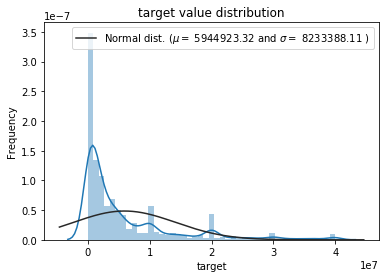

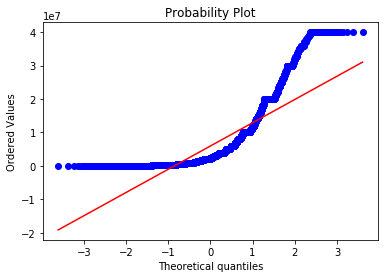

In [16]:
checkTargetInfo(train_df, target_name="target")

np.log1pを適用したが、余り変化なかった

14.490239292748585 1.7507504829494496


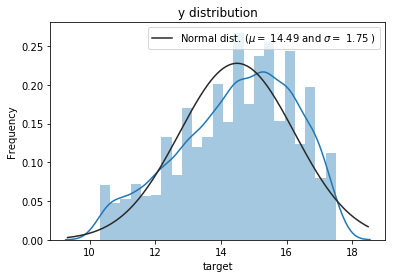

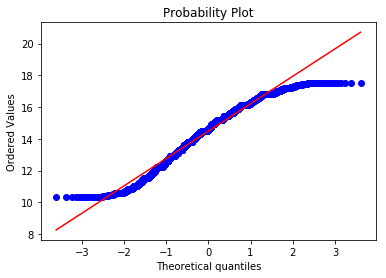

In [17]:
# apply logarithm transformation

train_df["target"] = np.log1p(train_df["target"])
sns.distplot(train_df["target"], fit=norm)

(mu, sigma) = norm.fit(train_df["target"])
print(mu, sigma)

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

fig = plt.figure()
res = stats.probplot(train_df["target"], plot=plt)
plt.show()


## checkCorrelationOfSelectedFeatures(dataframe, columns):


# correlation matrix


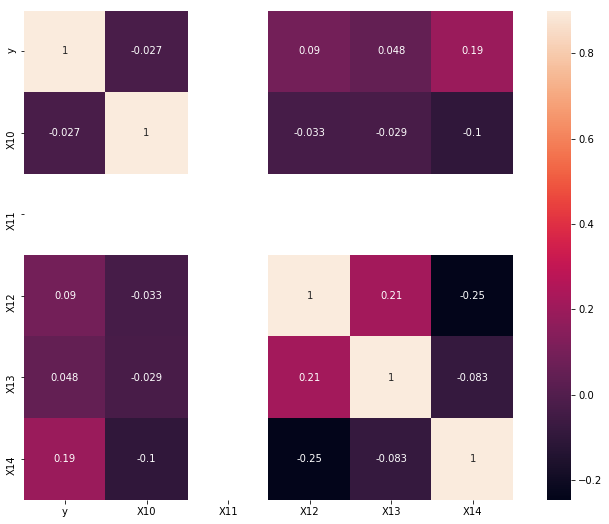

            y       X10  X11       X12       X13       X14
y    1.000000 -0.026985  NaN  0.089792  0.048276  0.193643
X10 -0.026985  1.000000  NaN -0.033084 -0.028806 -0.100474
X11       NaN       NaN  NaN       NaN       NaN       NaN
X12  0.089792 -0.033084  NaN  1.000000  0.214825 -0.246513
X13  0.048276 -0.028806  NaN  0.214825  1.000000 -0.083141
X14  0.193643 -0.100474  NaN -0.246513 -0.083141  1.000000


In [13]:
def checkCorrelationOfSelectedFeatures(dataframe, columns):
    """check correlation matix of each features"""

    # plot corr
    print("\n# correlation matrix")
    corrmat = dataframe[columns].corr()
    plt.subplots(figsize=(12,9))
    sns.heatmap(corrmat, vmax=0.9, square=True, annot=True)
    plt.show()
    print(corrmat)
    
    
columns = ["y", "X10", "X11", "X12", "X13", "X14"]
checkCorrelationOfSelectedFeatures(train_df, columns)

## def splitToIdTargetFeatures(train_df):

In [14]:
def splitToIdTargetFeatures(dataframe, id_name, target_name):
    
    id_df = dataframe[id_name]
    target_df = dataframe[target_name]
    features_df = dataframe.drop([id_name, target_name], axis=1)
    
    return id_df, target_df, features_df

In [15]:
id_df, target_df, features_df = splitToIdTargetFeatures(train_df, id_name="ID", target_name="y")

id_df.head()

0     0
1     6
2     7
3     9
4    13
Name: ID, dtype: int64

In [16]:
target_df.head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

In [17]:
features_df.head()

X0 X1  X2 X3 X4 X5 X6 X8  X10  X11  ...   X375  X376  X377  X378  X379  \
0   k  v  at  a  d  u  j  o    0    0  ...      0     0     1     0     0   
1   k  t  av  e  d  y  l  o    0    0  ...      1     0     0     0     0   
2  az  w   n  c  d  x  j  x    0    0  ...      0     0     0     0     0   
3  az  t   n  f  d  x  l  e    0    0  ...      0     0     0     0     0   
4  az  v   n  f  d  h  d  n    0    0  ...      0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 376 columns]

## pairplot

- not good idea to make function
- better to use pairplot() directly. more useful.

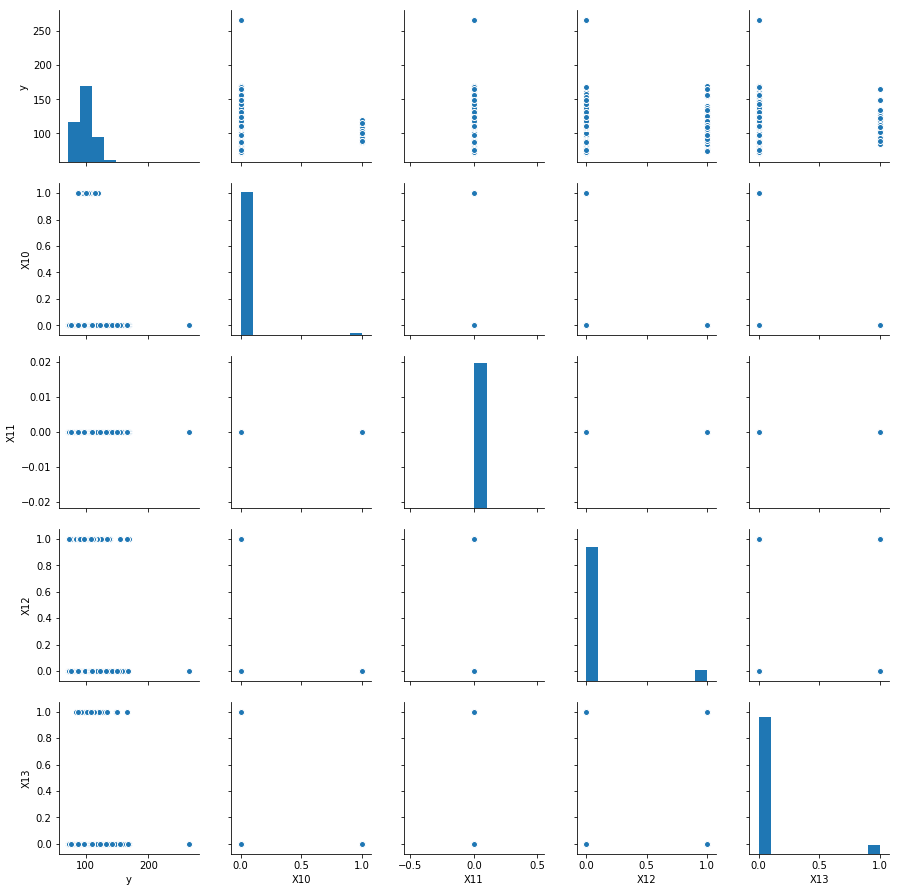

In [18]:
sns.pairplot(train_df, vars=["y", "X10", "X11", "X12", "X13"]) # takes too much time



----
# EDA

----

# feature eng

In [19]:
ntrain = train_df.shape[0]
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)

all_id, all_target, all_data = splitToIdTargetFeatures(all_data, id_name="ID", target_name="y")

#all_data.drop(['y'], axis=1, inplace=True)

In [20]:
all_data.shape

(8418, 376)

In [21]:
all_data.head()

X0 X1  X10  X100  X101  X102  X103  X104  X105  X106 ...   X90  X91  X92  \
0   k  v    0     0     0     0     0     0     0     0 ...     0    0    0   
1   k  t    0     1     1     0     0     0     0     0 ...     0    0    0   
2  az  w    0     0     1     0     0     0     0     0 ...     0    0    0   
3  az  t    0     0     1     0     0     0     0     0 ...     0    0    0   
4  az  v    0     0     1     0     0     0     0     0 ...     0    0    0   

   X93  X94  X95  X96  X97  X98  X99  
0    0    0    0    0    0    0    0  
1    0    0    0    1    0    1    0  
2    0    0    0    1    0    1    0  
3    0    0    0    1    0    1    0  
4    0    0    0    1    0    1    0  

[5 rows x 376 columns]

In [22]:
all_data.tail()

X0  X1  X10  X100  X101  X102  X103  X104  X105  X106 ...   X90  X91  \
8413  aj   h    0     1     1     0     1     0     0     0 ...     0    0   
8414   t  aa    0     1     1     0     1     0     0     0 ...     0    0   
8415   y   v    0     1     1     0     1     0     0     0 ...     0    0   
8416  ak   v    0     1     1     0     1     0     0     0 ...     0    0   
8417   t  aa    0     1     1     0     1     0     0     0 ...     0    0   

      X92  X93  X94  X95  X96  X97  X98  X99  
8413    0    0    0    0    1    0    1    0  
8414    0    0    0    0    1    0    1    0  
8415    0    0    0    0    1    0    1    0  
8416    0    0    0    0    1    0    1    0  
8417    0    0    0    0    0    0    1    0  

[5 rows x 376 columns]

In [23]:
all_id.head()

0     0
1     6
2     7
3     9
4    13
Name: ID, dtype: int64

In [24]:
all_id.tail()

8413    8410
8414    8411
8415    8413
8416    8414
8417    8416
Name: ID, dtype: int64

In [25]:
all_target.head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

In [26]:
all_target.tail()

8413   NaN
8414   NaN
8415   NaN
8416   NaN
8417   NaN
Name: y, dtype: float64

## skew feature

In [27]:
checkSkewness(all_data)


# Skew in numerical features: 

           Skew
X233  91.733310
X297  91.733310
X11   91.733310
X235  91.733310
X268  91.733310
X296  91.733310
X295  91.733310
X293  91.733310
X290  91.733310
X330  91.733310
X257  91.733310
X190  64.853683
X347  64.853683
X369  64.853683
X259  64.853683
X339  64.853683
X280  64.853683
X289  64.853683
X210  64.853683
X288  64.853683
X93   64.853683
X278  52.943369
X236  52.943369
X124  52.943369
X372  52.943369
X252  45.842126
X270  45.842126
X107  45.842126
X95   45.842126
X33   45.842126
...         ...
X156  -0.944914
X273  -0.959115
X51   -0.970170
X275  -1.013119
X363  -1.152142
X96   -1.172730
X142  -1.269795
X103  -1.397666
X150  -1.425548
X144  -1.537248
X209  -2.627196
X265  -2.839248
X238  -3.059389
X189  -3.062292
X70   -3.100571
X304  -3.277886
X101  -3.569890
X98   -3.806500
X80   -4.050459
X348  -4.066965
X61   -4.316619
X229  -4.415272
X120  -4.534135
X136  -4.592909
X263  -4.607904
X128  -4.692647
X361  -5.000386
X111  -6.076302
X74  -2

## find boolean feature

In [28]:
checkValueCounts(all_data)

# value_counts of each feature: 
X0  -> not boolean. value count:   53
X1  -> not boolean. value count:   27
X10  -> maybe boolean. value count:   2
X100  -> maybe boolean. value count:   2
X101  -> maybe boolean. value count:   2
X102  -> maybe boolean. value count:   2
X103  -> maybe boolean. value count:   2
X104  -> maybe boolean. value count:   2
X105  -> maybe boolean. value count:   2
X106  -> maybe boolean. value count:   2
X107  -> maybe boolean. value count:   2
X108  -> maybe boolean. value count:   2
X109  -> maybe boolean. value count:   2
X11  -> maybe boolean. value count:   2
X110  -> maybe boolean. value count:   2
X111  -> maybe boolean. value count:   2
X112  -> maybe boolean. value count:   2
X113  -> maybe boolean. value count:   2
X114  -> maybe boolean. value count:   2
X115  -> maybe boolean. value count:   2
X116  -> maybe boolean. value count:   2
X117  -> maybe boolean. value count:   2
X118  -> maybe boolean. value count:   2
X119  -> maybe boolean. value co

X299  -> maybe boolean. value count:   2
X3  -> not boolean. value count:   7
X30  -> maybe boolean. value count:   2
X300  -> maybe boolean. value count:   2
X301  -> maybe boolean. value count:   2
X302  -> maybe boolean. value count:   2
X304  -> maybe boolean. value count:   2
X305  -> maybe boolean. value count:   2
X306  -> maybe boolean. value count:   2
X307  -> maybe boolean. value count:   2
X308  -> maybe boolean. value count:   2
X309  -> maybe boolean. value count:   2
X31  -> maybe boolean. value count:   2
X310  -> maybe boolean. value count:   2
X311  -> maybe boolean. value count:   2
X312  -> maybe boolean. value count:   2
X313  -> maybe boolean. value count:   2
X314  -> maybe boolean. value count:   2
X315  -> maybe boolean. value count:   2
X316  -> maybe boolean. value count:   2
X317  -> maybe boolean. value count:   2
X318  -> maybe boolean. value count:   2
X319  -> maybe boolean. value count:   2
X32  -> maybe boolean. value count:   2
X320  -> maybe boolean.

## Box Cox Transformation of (highly) skewed features

almost all are boolean features.

need to exclude boolean for trans


----

# prepare train/test data

## with categorical feature
X_train_with_cat, X_test_with_cat, y_train_with_cat, y_test_with_cat

In [29]:
train_df.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...   X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...      0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...      1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...      0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...      0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...      0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]

In [30]:
#X_train_df_with_cat = train_df.drop(["y", "ID"], axis=1)
#y_train_df = train_df["y"]
#id_train_df = train_df["ID"]

id_train_df, y_train_df, X_train_df_with_cat = splitToIdTargetFeatures(train_df, id_name="ID", target_name="y")

In [31]:
print(id_train_df.head())
print(y_train_df.head())
print(X_train_df_with_cat.head())

0     0
1     6
2     7
3     9
4    13
Name: ID, dtype: int64
0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64
   X0 X1  X2 X3 X4 X5 X6 X8  X10  X11  ...   X375  X376  X377  X378  X379  \
0   k  v  at  a  d  u  j  o    0    0  ...      0     0     1     0     0   
1   k  t  av  e  d  y  l  o    0    0  ...      1     0     0     0     0   
2  az  w   n  c  d  x  j  x    0    0  ...      0     0     0     0     0   
3  az  t   n  f  d  x  l  e    0    0  ...      0     0     0     0     0   
4  az  v   n  f  d  h  d  n    0    0  ...      0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 376 columns]


In [32]:
X_train_with_cat, X_test_with_cat, y_train_with_cat, y_test_with_cat = train_test_split(
    X_train_df_with_cat, y_train_df, 
    test_size=0.33, random_state=42)
print("train/test data shape", X_train_with_cat.shape, X_test_with_cat.shape)


train/test data shape (2820, 376) (1389, 376)


In [33]:
X_train_df_with_cat.head()

X0 X1  X2 X3 X4 X5 X6 X8  X10  X11  ...   X375  X376  X377  X378  X379  \
0   k  v  at  a  d  u  j  o    0    0  ...      0     0     1     0     0   
1   k  t  av  e  d  y  l  o    0    0  ...      1     0     0     0     0   
2  az  w   n  c  d  x  j  x    0    0  ...      0     0     0     0     0   
3  az  t   n  f  d  x  l  e    0    0  ...      0     0     0     0     0   
4  az  v   n  f  d  h  d  n    0    0  ...      0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 376 columns]

## get object type columns

In [34]:
obj_columns = X_train_df_with_cat.select_dtypes(include=['object'])
print(obj_columns.columns)

cat_dims = [X_train_df_with_cat.columns.get_loc(i) for i in obj_columns.columns] 
print(cat_dims)

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')
[0, 1, 2, 3, 4, 5, 6, 7]


## without categorical feature

X_train, X_test, y_train, y_test

In [35]:
id_train_df = train_df["ID"] # defining again. maybe in future, I will data set with categorical feature which I defined before. 
id_test_df = test_df["ID"]

In [36]:
# defining ntrain, all_data again. maybe in future, I will data set with categorical feature which I defined before.
ntrain = train_df.shape[0]
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
#all_data.drop(['y', "ID"], axis=1, inplace=True)
all_id, all_target, all_data  = splitToIdTargetFeatures(all_data, id_name="ID", target_name="y")

print("all_data.shape before: ", all_data.shape)
all_data = pd.get_dummies(all_data)
print("all_data.shape after get_dummies: ", all_data.shape)

train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

all_data.shape before:  (8418, 376)
all_data.shape after get_dummies:  (8418, 579)


In [37]:
print("train_df.shape: ", train_df.shape)
train_df.head()

train_df.shape:  (4209, 579)


X10  X100  X101  X102  X103  X104  X105  X106  X107  X108  ...   X8_p  \
0    0     0     0     0     0     0     0     0     0     0  ...      0   
1    0     1     1     0     0     0     0     0     0     0  ...      0   
2    0     0     1     0     0     0     0     0     0     0  ...      0   
3    0     0     1     0     0     0     0     0     0     1  ...      0   
4    0     0     1     0     0     0     0     0     0     1  ...      0   

   X8_q  X8_r  X8_s  X8_t  X8_u  X8_v  X8_w  X8_x  X8_y  
0     0     0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     1     0  
3     0     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0     0  

[5 rows x 579 columns]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    train_df, y_train_df,
    test_size=0.33, random_state=42)
print("train/test data shape", X_train.shape, X_test.shape)


train/test data shape (2820, 579) (1389, 579)


In [39]:
X_train.head()

X10  X100  X101  X102  X103  X104  X105  X106  X107  X108  ...   X8_p  \
2218    0     1     1     0     1     0     0     0     0     0  ...      0   
1688    0     1     1     0     1     0     0     0     0     0  ...      0   
2242    0     1     1     0     1     0     0     0     0     0  ...      0   
582     0     0     1     0     1     0     0     0     0     0  ...      0   
2132    0     1     1     0     1     0     0     0     0     0  ...      0   

      X8_q  X8_r  X8_s  X8_t  X8_u  X8_v  X8_w  X8_x  X8_y  
2218     0     0     0     0     0     0     0     0     0  
1688     0     0     0     0     0     0     0     0     0  
2242     0     0     0     0     1     0     0     0     0  
582      0     0     0     0     0     0     0     0     0  
2132     0     0     0     0     0     0     0     0     1  

[5 rows x 579 columns]

# base model

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

from hyperopt import hp, tpe, Trials, fmin

from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import xgboost as xgb
from xgboost import XGBRegressor

import lightgbm as lgb
from lightgbm import LGBMRegressor

from mlxtend.regressor import StackingRegressor

## Defined find best parameter function by hyperopt module

### give model for hyperopt my funcs

In [41]:

def hyperopt_objective(model, X_train, y_train, scoring="r2", cv_size=5, n_jobs=3):
    """return objective function for hyperopt"""

    def objective(args):
#        print(model.steps[-1])
        model.steps[-1][1].set_params(**args)

        score = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv_size, n_jobs=n_jobs)
        return -score.mean()

    return objective





def searchHyperParam(model, par_space, X_train, y_train, scoring="r2", max_evals=100, cv_size=5, n_jobs=3):
    """search hyper parameter of a selected model"""

    objective = hyperopt_objective(model, X_train, y_train, scoring=scoring, cv_size=cv_size, n_jobs=n_jobs)
    
    #best_params = findBestParm(objective, par_space, X_train, y_train, scoring=scoring, max_evals=max_evals)

    trials = Trials()

    best = fmin(
        objective, 
        par_space, # 探索するパラメータのdictもしくはlist
        algo=tpe.suggest, # どのロジックを利用するか、基本的にはtpe.suggestでok
        max_evals=max_evals,
        trials=trials,
        verbose=1
    )
    print("best par: ", best)
    print("best trial: ", trials.best_trial["result"])
    #print("trials losses: ", trials.losses())
    
    return best


def evalModelByCV(model, X_train, y_train):
    """evaluate model by cross validation"""
    
    score = cross_val_score(model, X_train, y_train, scoring="r2", cv=5)

    print("model score: {:f} ({:f})\n" .format(
        score.mean(), score.std()))
    print("all scores: ", score)

    
def plot_my_learning_curves(X_train, y_train, X_test, y_test, model, scoring="r2", cv=5, n_jobs=3):
    """plot learning curves by mlxtend and my func my_plot_learning_curve()"""
    plot_learning_curves(X_train, y_train, X_test, y_test, 
                     model, scoring=scoring)
    plt.show()
    
    title = "Learning Curves"
    my_plot_learning_curve(model, title, 
                        X_train, y_train,
                        #ylim=(0.7, 1.01), 
                        cv=cv, scoring=scoring,
                        n_jobs=n_jobs)
    plt.show()

    
    

### give model_name for hyperopt my funcs

** NOT ACCTIVATED !!!**

## Def hyperopt param

In [42]:
cv_size = 5
max_evals = 10

## SVR

In [43]:
svr = make_pipeline(
    RobustScaler(),
    SVR()

)

kernel_list = ['rbf', 'poly', 'sigmoid']
par_space = {
    'C':hp.loguniform('C', -8, 2),
    'gamma':hp.loguniform('gamma', -8, 2),
    'epsilon':hp.loguniform('epsilon', -8, 2),
    'kernel':hp.choice('kernel', kernel_list)
}


In [45]:
best_params = {'C': 6.0125849233435975,
 'epsilon': 0.018596343856883617,
 'gamma': 0.019396603678872793,
 'kernel': 'rbf'}

model score: 0.560221 (0.038602)

all scores:  [0.50396199 0.57454623 0.55852882 0.62156701 0.54250185]


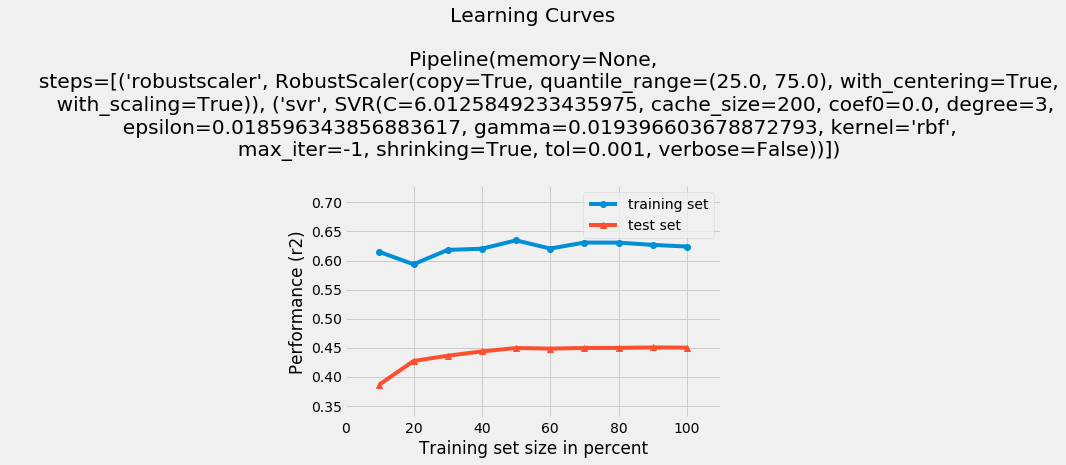

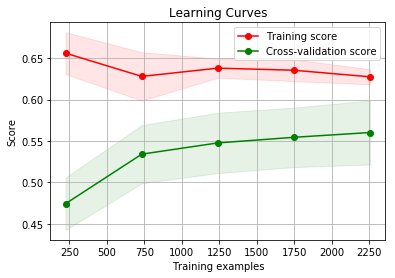

In [46]:
svr.steps[-1][1].set_params(**best_params)

evalModelByCV(svr, X_train, y_train)
plot_my_learning_curves(X_train, y_train, X_test, y_test, svr, scoring="r2", cv=5, n_jobs=3)

## lasso

In [47]:
lasso = make_pipeline(
    RobustScaler(),
    Lasso()

)

par_space = {
    'alpha':hp.uniform('alpha', 0, 1),
    
}

In [48]:
best_params = {'alpha': 0.03813148491610924}

/home/yuki/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/yuki/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


model score: 0.594549 (0.032242)

all scores:  [0.54734284 0.61750732 0.5864615  0.64116244 0.580271  ]


/home/yuki/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/yuki/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/yuki/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


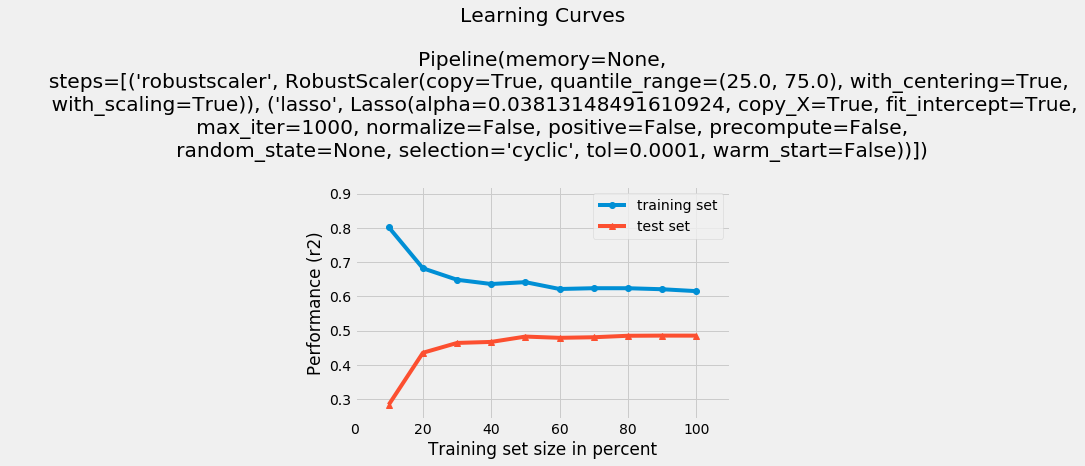

/home/yuki/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/yuki/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/yuki/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/yuki/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. 

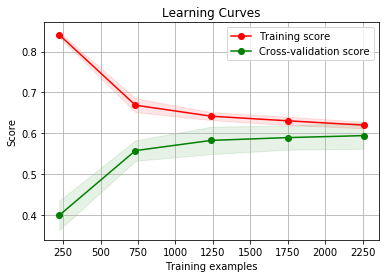

In [49]:

lasso.steps[-1][1].set_params(**best_params)

evalModelByCV(lasso, X_train, y_train)
plot_my_learning_curves(X_train, y_train, X_test, y_test, lasso, scoring="r2", cv=5, n_jobs=3)

## Elastic net

In [50]:
elasticnet = make_pipeline(
    RobustScaler(),
    ElasticNet()

)
par_space = {
    'alpha':hp.uniform('alpha', 0, 1),
    'l1_ratio':hp.uniform('l1_ratio', 0, 1),
    
}

In [51]:
best_params = {'alpha': 0.03979354323226861, 'l1_ratio': 0.9027788528223015}

model score: 0.592658 (0.032608)

all scores:  [0.54579514 0.61518801 0.58498386 0.64061131 0.57671275]


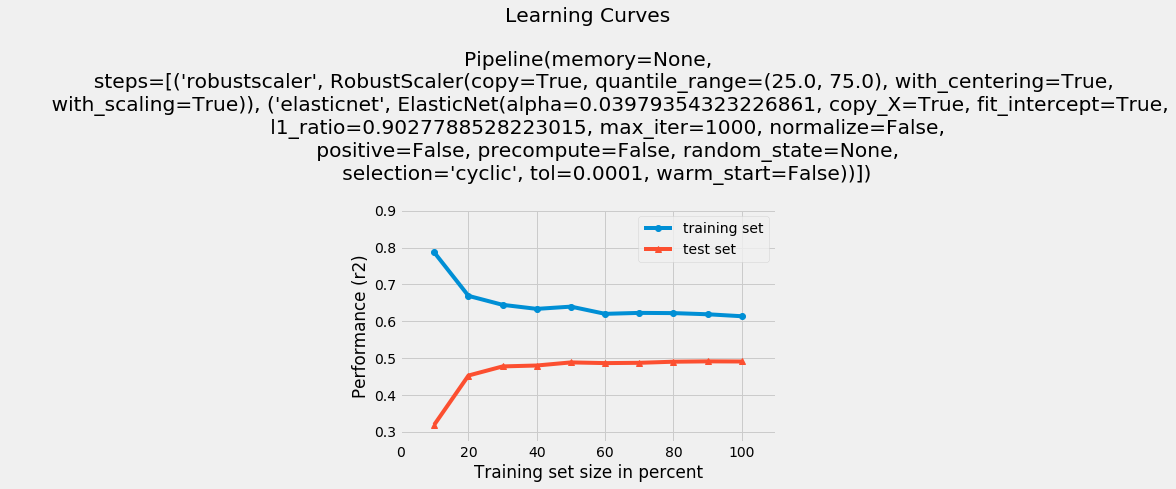

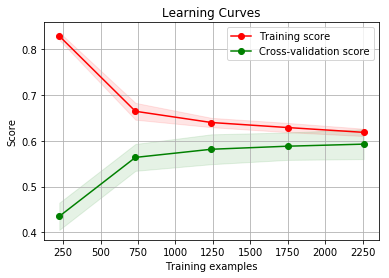

In [52]:

elasticnet.steps[-1][1].set_params(**best_params)

evalModelByCV(elasticnet, X_train, y_train)
plot_my_learning_curves(X_train, y_train, X_test, y_test, elasticnet, scoring="r2", cv=5, n_jobs=3)


## kernel ridge

In [53]:
krr = make_pipeline(
        #RobustScaler(),
        KernelRidge()
)

kernel_list = ['rbf', 'poly', 'sigmoid']
par_space = {
    'alpha':hp.uniform('alpha', 0, 1),
    'gamma':hp.loguniform('gamma', -8, 2),
    'kernel':hp.choice('kernel', kernel_list),
    'degree':hp.randint('degree', 5),
#    'coef0': # default value is enough
    
}

In [54]:
best_params = {'alpha': 0.06208805100456642,
 'degree': 2,
 'gamma': 0.000700959885815984,
 'kernel': 'rbf'}

model score: 0.583964 (0.032021)

all scores:  [0.53914429 0.60567647 0.57517786 0.63200974 0.56780952]


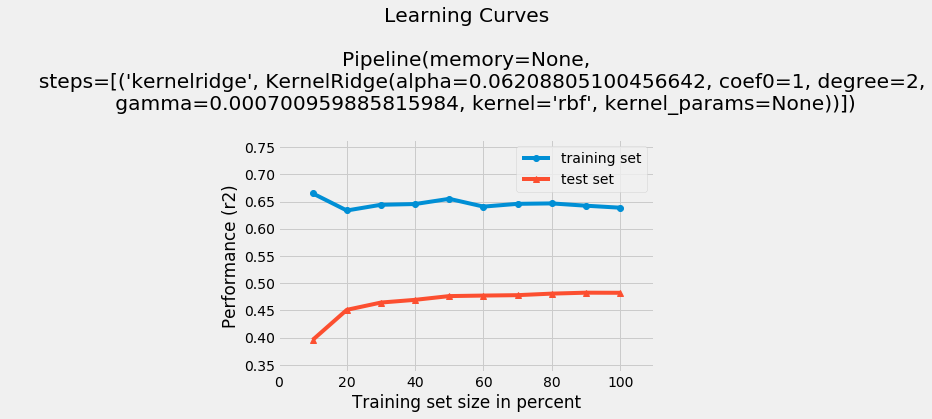

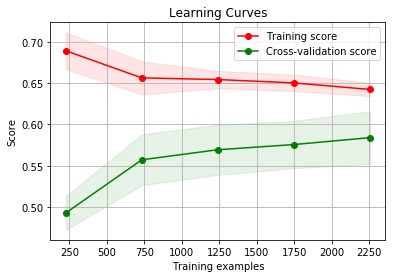

In [55]:
krr.steps[-1][1].set_params(**best_params)

evalModelByCV(krr, X_train, y_train)
plot_my_learning_curves(X_train, y_train, X_test, y_test, krr, scoring="r2", cv=5, n_jobs=3)


## k neighbers

In [56]:
knr = make_pipeline(
    #RobustScaler(),
    KNeighborsRegressor()
)

par_space = {
#    'n_neighbors':hp.choice('n_neighbors', [1,2,3,4,5,6,7,8,9,10]),
#    'n_neighbors':hp.quniform('n_neighbors', 1, 10, 1),
    'n_neighbors':hp.choice('n_neighbors', np.arange(1, 10, dtype=int))
#    'coef0': # default value is enough
    
}

In [57]:
best_params = {'n_neighbors': 8}

In [58]:
knr.steps[-1][1].set_params(**best_params)


evalModelByCV(knr, X_train, y_train)

plot_my_learning_curves(X_train, y_train, X_test, y_test, knr, scoring="r2", cv=5, n_jobs=3)

model score: 0.475911 (0.029694)

all scores:  [0.42226043 0.49608089 0.50629492 0.48734827 0.46757152]


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/yuki/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-58-a5d9485c16ce>", line 6, in <module>
    plot_my_learning_curves(X_train, y_train, X_test, y_test, knr, scoring="r2", cv=5, n_jobs=3)
  File "<ipython-input-41-45ad3a49355a>", line 55, in plot_my_learning_curves
    model, scoring=scoring)
  File "/home/yuki/anaconda3/lib/python3.6/site-packages/mlxtend/plotting/learning_curves.py", line 107, in plot_learning_curves
    y_test_predict = clf.predict(X_test)
  File "/home/yuki/anaconda3/lib/python3.6/site-packages/sklearn/utils/metaestimators.py", line 115, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "/home/yuki/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py", line 307, in predict
    return self.steps[-1][-1].predict(Xt)
  File "/home/yuki/anaconda3/lib/python3.6

KeyboardInterrupt: 

## Random forest

In [ ]:
ranfore = make_pipeline(
        #RobustScaler(),
        RandomForestRegressor()
)

par_space = {
    'n_estimators':hp.choice('n_estimators', np.arange(1, 100, dtype=int)),
    'max_features':hp.choice('max_features', np.arange(1, 300, dtype=int)),
    'max_depth':hp.choice('max_depth', np.arange(1, 300, dtype=int)),
    'min_samples_split':hp.choice('min_samples_split', np.arange(2, 10, dtype=int)),
    'min_samples_leaf':hp.choice('min_samples_leaf', np.arange(1, 9, dtype=int)),   
}

In [ ]:
best_params = {'max_depth': 5,
 'max_features': 226,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 56}

In [ ]:
ranfore.steps[-1][1].set_params(**best_params)

evalModelByCV(ranfore, X_train, y_train)
plot_my_learning_curves(X_train, y_train, X_test, y_test, ranfore, scoring="r2", cv=5, n_jobs=3)
# plot feature importance
pd.concat((pd.DataFrame(X_train.columns, columns = ['variable']), 
           pd.DataFrame(ranfore.named_steps["randomforestregressor"].feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

## gradient boosting

In [ ]:
gboostreg = make_pipeline(
        #RobustScaler(),
        GradientBoostingRegressor()
)

loss_list = ['ls', 'lad', 'huber', 'quantile']

par_space = {
    'n_estimators':hp.choice('n_estimators', np.arange(1, 100, dtype=int)),
    'learning_rate':hp.uniform('learning_rate', 0.000000001, 1.0),
    'max_features':hp.choice('max_features', np.arange(1, 300, dtype=int)),
    'max_depth':hp.choice('max_depth', np.arange(1, 300, dtype=int)),
    'min_samples_split':hp.choice('min_samples_split', np.arange(2, 30, dtype=int)),
    'min_samples_leaf':hp.choice('min_samples_leaf', np.arange(1, 29, dtype=int)),
    'loss':hp.choice('loss', loss_list),
    #'subsample':hp.uniform('learning_rate', 0.0, 1.0),
    
}


In [ ]:
best_params = {'learning_rate': 0.35189025799801155,
 'loss': 'huber',
 'max_depth': 3,
 'max_features': 119,
 'min_samples_leaf': 16,
 'min_samples_split': 19,
 'n_estimators': 48}

In [ ]:
gboostreg.steps[-1][1].set_params(**best_params)

evalModelByCV(gboostreg, X_train, y_train)
plot_my_learning_curves(X_train, y_train, X_test, y_test, gboostreg, scoring="r2", cv=5, n_jobs=3)
# plot feature importance
pd.concat((pd.DataFrame(X_train.columns, columns = ['variable']), 
           pd.DataFrame(gboostreg.named_steps["gradientboostingregressor"].feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

## XGBoost

In [80]:
xgbmodel = make_pipeline(
        #RobustScaler(),
        XGBRegressor()
)


par_space = {
    'n_estimators':hp.choice('n_estimators', np.arange(1, 100, dtype=int)),
    'learning_rate':hp.uniform('learning_rate', 0.000000001, 1.0),
    'max_depth':hp.choice('max_depth', np.arange(1, 300, dtype=int)), 
    'gamma':hp.uniform('gamma', 0.0, 5.0),
    'min_child_weight':hp.uniform('min_child_weight', 0.0, 5.0),
    'subsample': hp.uniform('subsample', 0.0, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.0, 1.0),
    'reg_alpha': hp.loguniform('reg_alpha', -6, 2),
    'reg_lambda': hp.loguniform('reg_lambda', -6, 2),
    'learning_rate': hp.uniform('learning_rate', 0.000000001, 1.0),
}

In [81]:
best_params = searchHyperParam(xgbmodel, par_space, X_train, y_train, scoring="r2", max_evals=max_evals, cv_size=cv_size, n_jobs=3)
best_params

best par:  {'colsample_bytree': 0.4708332878894328, 'gamma': 4.468853259609137, 'learning_rate': 0.05617427300476756, 'max_depth': 227, 'min_child_weight': 1.8959293704519609, 'n_estimators': 69, 'reg_alpha': 0.011073130482133953, 'reg_lambda': 0.00429738591644784, 'subsample': 0.034785099220768445}
best trial:  {'loss': -0.527460450939343, 'status': 'ok'}


{'colsample_bytree': 0.4708332878894328,
 'gamma': 4.468853259609137,
 'learning_rate': 0.05617427300476756,
 'max_depth': 227,
 'min_child_weight': 1.8959293704519609,
 'n_estimators': 69,
 'reg_alpha': 0.011073130482133953,
 'reg_lambda': 0.00429738591644784,
 'subsample': 0.034785099220768445}

In [82]:
best_params = {'colsample_bytree': 0.4708332878894328,
 'gamma': 4.468853259609137,
 'learning_rate': 0.05617427300476756,
 'max_depth': 227,
 'min_child_weight': 1.8959293704519609,
 'n_estimators': 69,
 'reg_alpha': 0.011073130482133953,
 'reg_lambda': 0.00429738591644784,
 'subsample': 0.034785099220768445}

model score: 0.524655 (0.034656)

all scores:  [0.46066925 0.56261035 0.53793854 0.54133879 0.52072045]


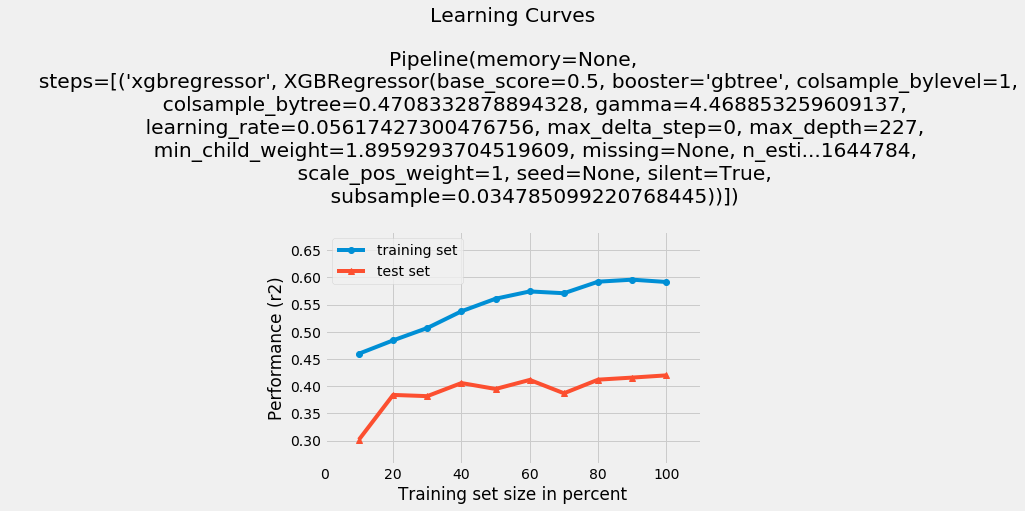

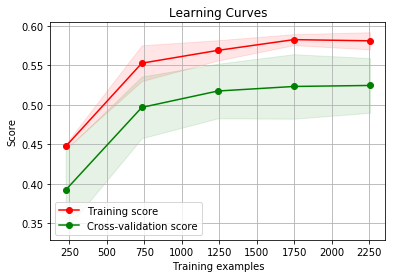

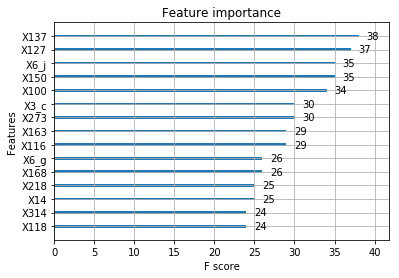

variable  importance
40      X137    0.016777
29      X127    0.016336
551     X6_j    0.015453
54      X150    0.015453
1       X100    0.015011
186     X273    0.013245
500     X3_c    0.013245
18      X116    0.012804
68      X163    0.012804
548     X6_g    0.011479
73      X168    0.011479
43       X14    0.011038
126     X218    0.011038
230     X314    0.010596
20      X118    0.010596
182      X27    0.010155
60      X156    0.010155
129     X220    0.010155
108     X201    0.010155
17      X115    0.009713
62      X158    0.009272
16      X114    0.009272
333      X64    0.009272
229     X313    0.009272
550     X6_i    0.009272
349      X81    0.008830
216     X300    0.008830
46      X142    0.008830
35      X132    0.008830
31      X129    0.008830
..       ...         ...
160     X249    0.000000
351      X83    0.000000
336      X67    0.000000
335      X66    0.000000
334      X65    0.000000
163     X252    0.000000
332      X63    0.000000
331      X62    0.000000
329      X60    0.000000
150      X24    0.000000
352      X84    0.000000
371    X0_ac    0.000000
362      X94    0.000000
370    X0_ab    0.000000
369    X0_aa    0.000000
368     X0_a    0.000000
367      X99    0.000000
365      X97    0.000000
147     X237    0.000000
363      X95    0.000000
361      X93    0.000000
149     X239    0.000000
360      X92    0.000000
359      X91    0.000000
358      X90    0.000000
357      X89    0.000000
356      X88    0.000000
355      X87    0.000000
354      X86    0.000000
289     X368    0.000000

[579 rows x 2 columns]

In [83]:
xgbmodel.steps[-1][1].set_params(**best_params)

evalModelByCV(xgbmodel, X_train, y_train)
plot_my_learning_curves(X_train, y_train, X_test, y_test, xgbmodel, scoring="r2", cv=5, n_jobs=3)


xgb.plot_importance(xgbmodel.named_steps["xgbregressor"], max_num_features=15)
plt.show()

# plot feature importance
pd.concat((pd.DataFrame(X_train.columns, columns = ['variable']), 
           pd.DataFrame(xgbmodel.named_steps["xgbregressor"].feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

## LightGBM

In [84]:
lgbmodel = make_pipeline(
        #RobustScaler(),
        LGBMRegressor(**best_params)
)

par_space = {
    'learning_rate':hp.uniform('learning_rate', 0.000000001, 1.0),
    'max_depth':hp.choice('max_depth', np.arange(1, 300, dtype=int)), 
    'num_leaves':hp.choice('num_leaves', np.arange(2, 100, dtype=int)),
    'min_data_in_leaf':hp.choice('min_data_in_leaf', np.arange(1, 100, dtype=int)),
    
    'n_estimators':hp.choice('n_estimators', np.arange(1, 100, dtype=int)),
    'max_bin':hp.choice('max_bin', np.arange(2, 300, dtype=int)),
    'bagging_fraction': hp.uniform('bagging_fraction', 0.000000001, 1.0),
    'bagging_freq': hp.randint('bagging_freq', 10),
    'feature_fraction': hp.uniform('feature_fraction', 0.000000001, 1.0),
    'min_sum_hessian_in_leaf': hp.loguniform('min_sum_hessian_in_leaf', -6, 2),
}

In [85]:
best_params = searchHyperParam(lgbmodel, par_space, X_train, y_train, scoring="r2", max_evals=max_evals, cv_size=cv_size, n_jobs=3)
best_params

best par:  {'bagging_fraction': 0.6558599032364169, 'bagging_freq': 1, 'feature_fraction': 0.5858231364017451, 'learning_rate': 0.06116145520022197, 'max_bin': 87, 'max_depth': 131, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 0.4388796240028399, 'n_estimators': 64, 'num_leaves': 91}
best trial:  {'loss': -0.5687309624677311, 'status': 'ok'}


{'bagging_fraction': 0.6558599032364169,
 'bagging_freq': 1,
 'feature_fraction': 0.5858231364017451,
 'learning_rate': 0.06116145520022197,
 'max_bin': 87,
 'max_depth': 131,
 'min_data_in_leaf': 5,
 'min_sum_hessian_in_leaf': 0.4388796240028399,
 'n_estimators': 64,
 'num_leaves': 91}

In [87]:
# used 100 max_evalus score

best_params = {'bagging_fraction': 0.6488366999217055,
 'bagging_freq': 4,
 'feature_fraction': 0.8769912726752449,
 'learning_rate': 0.2322285924856258,
 'max_bin': 259,
 'max_depth': 46,
 'min_data_in_leaf': 34,
 'min_sum_hessian_in_leaf': 0.011853166137307664,
 'n_estimators': 54,
 'num_leaves': 3}

model score: 0.592850 (0.033613)

all scores:  [0.54754175 0.61707558 0.58038147 0.64347283 0.5757783 ]


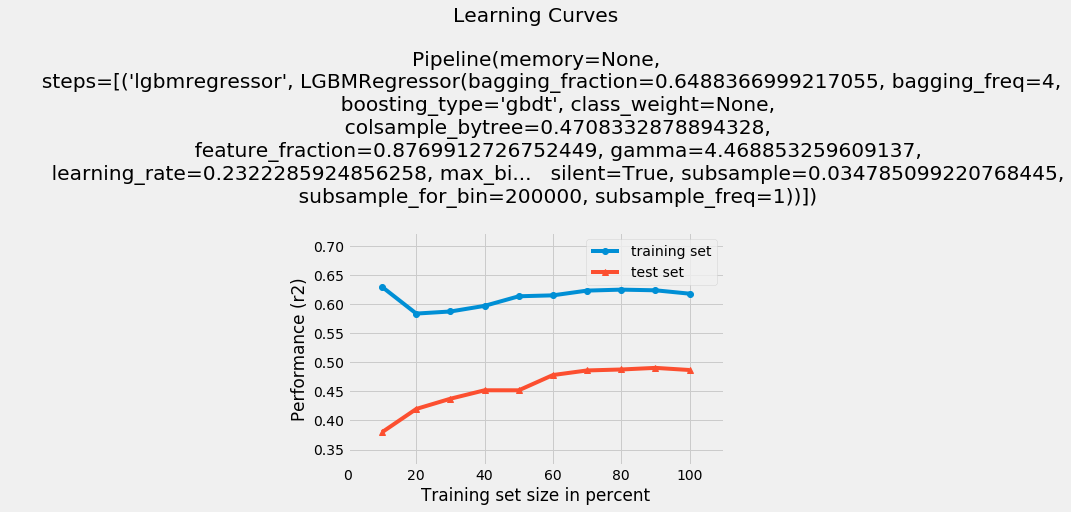

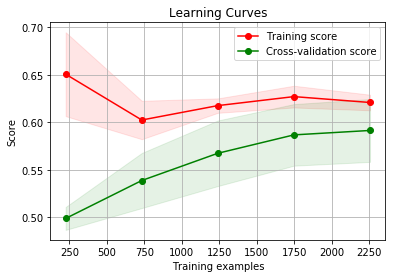

variable  importance
39      X136           7
231     X315           7
29      X127           6
173     X261           4
538     X5_w           3
23      X120           3
391    X0_ay           3
230     X314           3
20      X118           3
55      X151           3
333      X64           2
500     X3_c           2
529     X5_n           2
264     X345           2
413     X0_s           2
414     X0_t           2
188     X275           2
417     X0_w           2
22       X12           2
510    X5_aa           2
289     X368           1
255     X337           1
56      X152           1
343      X75           1
537     X5_v           1
534     X5_s           1
533     X5_r           1
532     X5_q           1
148     X238           1
68      X163           1
..       ...         ...
226     X310           0
225      X31           0
224     X309           0
223     X308           0
222     X307           0
221     X306           0
220     X305           0
219     X304           0
218     X302           0
217     X301           0
216     X300           0
215      X30           0
214     X299           0
212     X297           0
197     X283           0
211     X296           0
210     X295           0
209     X294           0
208     X293           0
207     X292           0
206     X291           0
205     X290           0
204      X29           0
203     X289           0
202     X288           0
201     X287           0
200     X286           0
199     X285           0
198     X284           0
578     X8_y           0

[579 rows x 2 columns]

In [88]:
lgbmodel.steps[-1][1].set_params(**best_params)


evalModelByCV(lgbmodel, X_train, y_train)


plot_my_learning_curves(X_train, y_train, X_test, y_test, lgbmodel, scoring="r2", cv=5, n_jobs=3)

# plot feature importance
pd.concat((pd.DataFrame(X_train.columns, columns = ['variable']), 
           pd.DataFrame(lgbmodel.named_steps["lgbmregressor"].feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)


### tried categorical_feature, but object type is not supported yet.
https://github.com/Microsoft/LightGBM/issues/1020

## catboost

In [ ]:
from catboost import CatBoostRegressor

print(list(obj_columns.columns.values))
print(cat_dims)

In [ ]:
X_train_with_cat.head()

In [ ]:
catReg = CatBoostRegressor(learning_rate=1,
                          depth=6,
                          loss_function='RMSE')

fit_model = catReg.fit(X_train_with_cat, y_train_with_cat, cat_features=cat_dims)


## TPOT

## todo

how to use R2 for scoring for catboost

https://tech.yandex.com/catboost/doc/dg/concepts/loss-functions-docpage/


# Stacking

/home/yuki/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/yuki/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


model score: 0.589658 (0.034918)

all scores:  [0.536513   0.60509833 0.58309899 0.64349815 0.58007963]


/home/yuki/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/yuki/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/yuki/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


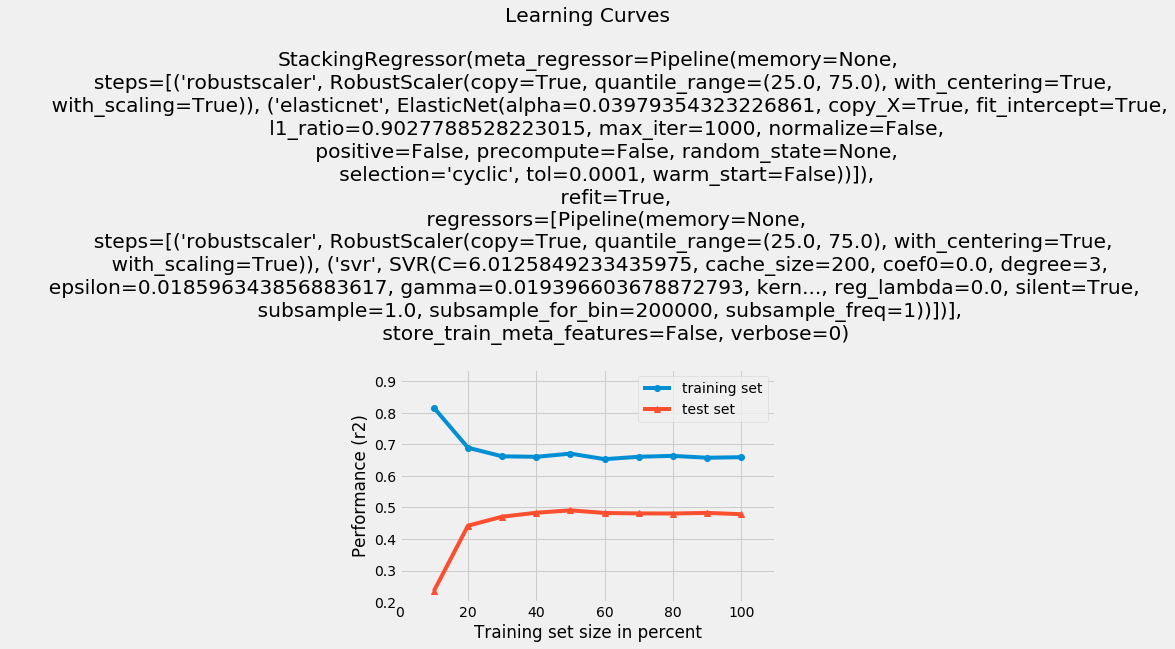

/home/yuki/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/yuki/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/yuki/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/yuki/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might wa

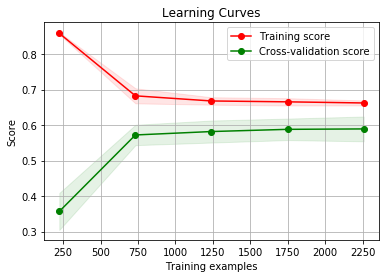

In [90]:
# svr, lasso, elasticnet, krr, knr, ranfore, gboostreg, xgbmodel

stregr = StackingRegressor(regressors=[
    svr,
    lasso, 
    #elasticnet, 
    #krr, 
    #knr, 
    ranfore, 
    gboostreg, 
    xgbmodel,
    lgbmodel,
],
                           meta_regressor=elasticnet)


evalModelByCV(stregr, X_train, y_train)


plot_my_learning_curves(X_train, y_train, X_test, y_test, stregr, scoring="r2", cv=5, n_jobs=3)



In [ ]:
stregr.

In [74]:
# https://rasbt.github.io/mlxtend/api_subpackages/mlxtend.regressor/
stregr.coef_

AttributeError: 'Pipeline' object has no attribute 'coef_'

In [91]:
# Training the stacking classifier with all train data

stregr.fit(train_df, y_train_df)

StackingRegressor(meta_regressor=Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.03979354323226861, copy_X=True, fit_intercept=True,
      l1_ratio=0.9027788528223015, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False))]),
         refit=True,
         regressors=[Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('svr', SVR(C=6.0125849233435975, cache_size=200, coef0=0.0, degree=3,
  epsilon=0.018596343856883617, gamma=0.019396603678872793, kern..., reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=1))])],
         store_train_meta_features=False, verbose=0)

# Make submission file
https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/submissions?sortBy=date&group=all&page=1

In [92]:
sub = pd.DataFrame()
sub['ID'] = id_test_df
sub['y'] = stregr.predict(test_df)
sub.to_csv('../output/submission.csv', index=False)
